In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, "dataset-preparation", 'raw-data','coco','toy-coco-cropped-allObjects')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 9

In [5]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            

def npz_opener_pil(path):
    # Load image as grayscale
    image = Image.open(path).convert('RGB')
    array_data = np.array(image)
    return array_data

# Red Wavelet

In [6]:
red_wv = convert_to_wavelet_basis(data_dir, "red", debug=True, image_opener = npz_opener_pil)
red_wv.head()

9 layers being used


100%|██████████| 4958/4958 [00:08<00:00, 587.99it/s]


channel  layer  frequency orientation  \
0     red      1   0.110679          L1   
1     red      2   0.124514           D   
2     red      2   0.124514           H   
3     red      2   0.124514           V   
4     red      3   0.142301           D   

                                                data  
0  [25727.43750000003, 34375.48046875004, 28814.3...  
1  [3729.500000000006, 857.0039062500023, 8.05859...  
2  [216.73437500000082, 8311.70703125001, 1480.79...  
3  [-6172.484375000005, 2319.0429687500014, -2366...  
4  [-1318.8750000000007, 934.5000000000018, 1311....

In [7]:
red_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 9):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    red_df = pd.concat([red_df, ks_df], axis = 0)
red_df

/var/folders/jd/4sjpm6q97knfqgwsf50gr3jh0000gn/T/ipykernel_15835/1668664979.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  red_df = pd.concat([red_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
1     2     D      V  0.094595   1.015612e-19
2     2     H      V  0.134127   2.827616e-39
0     2     D      H  0.218233  8.560642e-104
2     3     H      V  0.079619   4.011585e-55
1     3     D      V  0.090863   1.085811e-71
0     3     D      H  0.166045  2.066827e-239
2     4     H      V  0.062714  4.607549e-136
1     4     D      V  0.085014  7.585423e-250
0     4     D      H  0.139711   0.000000e+00
2     5     H      V  0.047625  3.664013e-313
1     5     D      V  0.079452   0.000000e+00
0     5     D      H  0.121940   0.000000e+00
2     6     H      V  0.040407   0.000000e+00
1     6     D      V  0.074657   0.000000e+00
0     6     D      H  0.110561   0.000000e+00
2     7     H      V  0.034595   0.000000e+00
1     7     D      V  0.077704   0.000000e+00
0     7     D      H  0.103489   0.000000e+00
2     8     H      V  0.025922   0.000000e+00
1     8     D      V  0.064990   0.000000e+00
0     8     D      H  0.088926   0.000000e+00

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


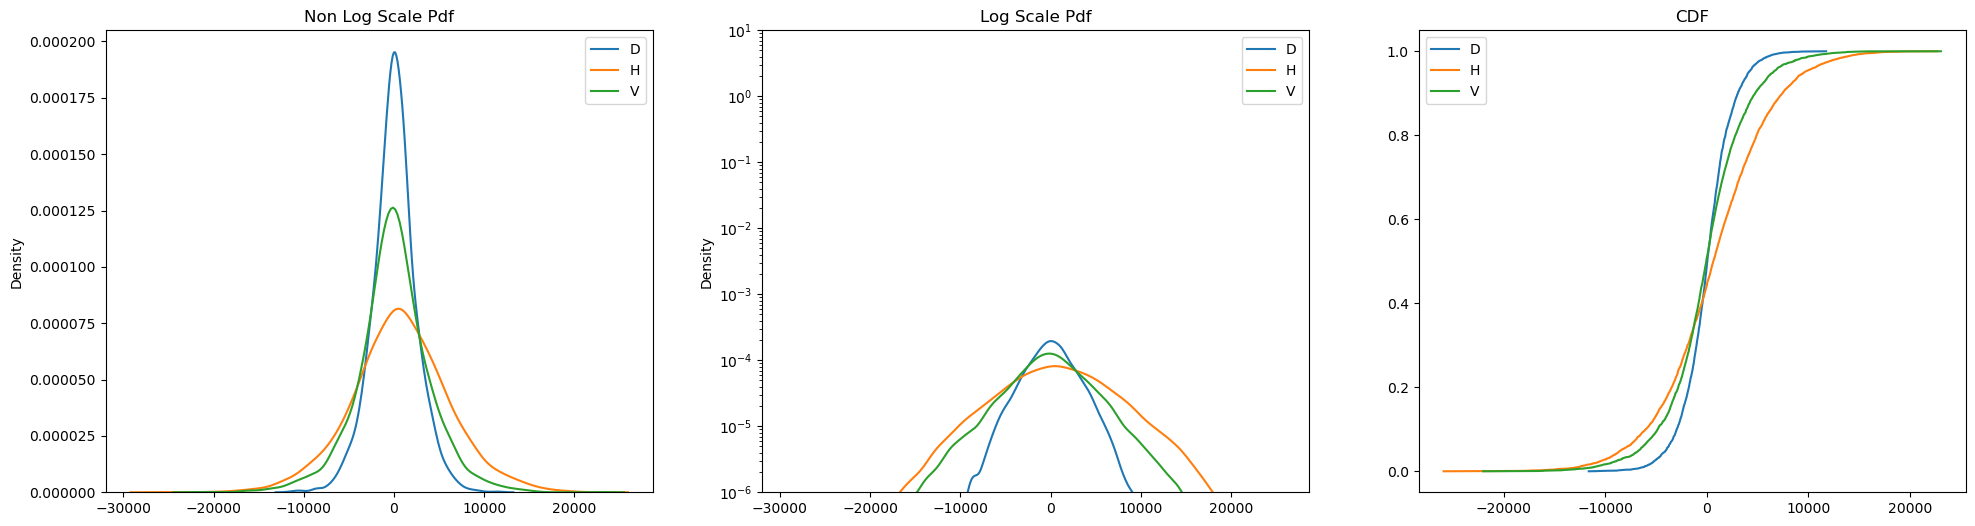

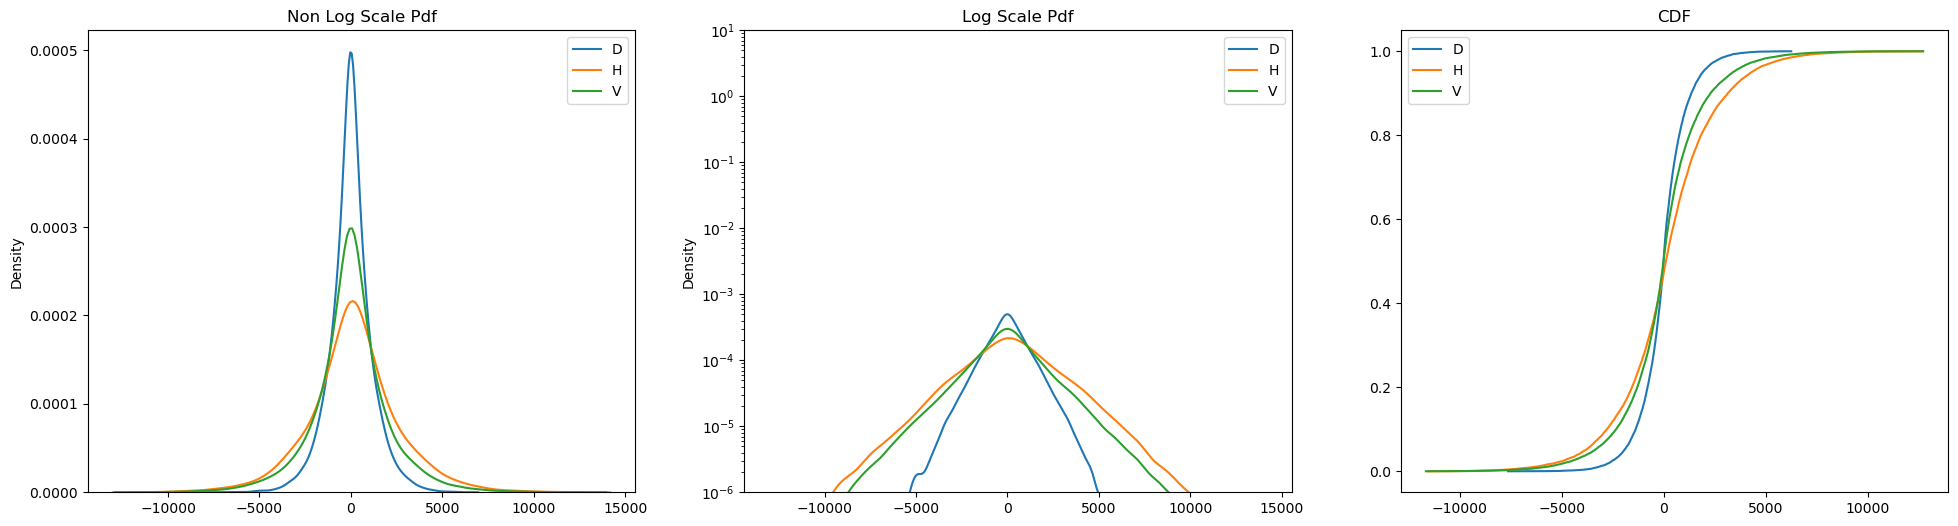

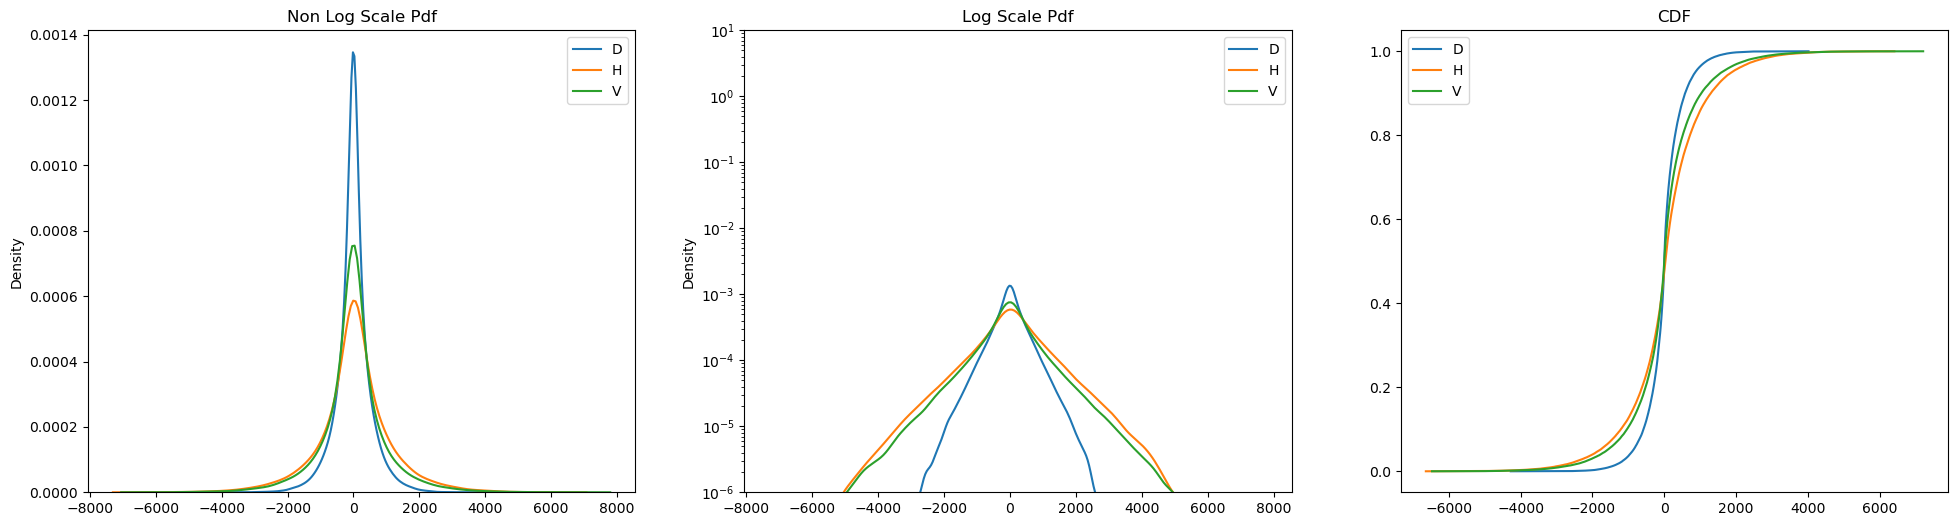

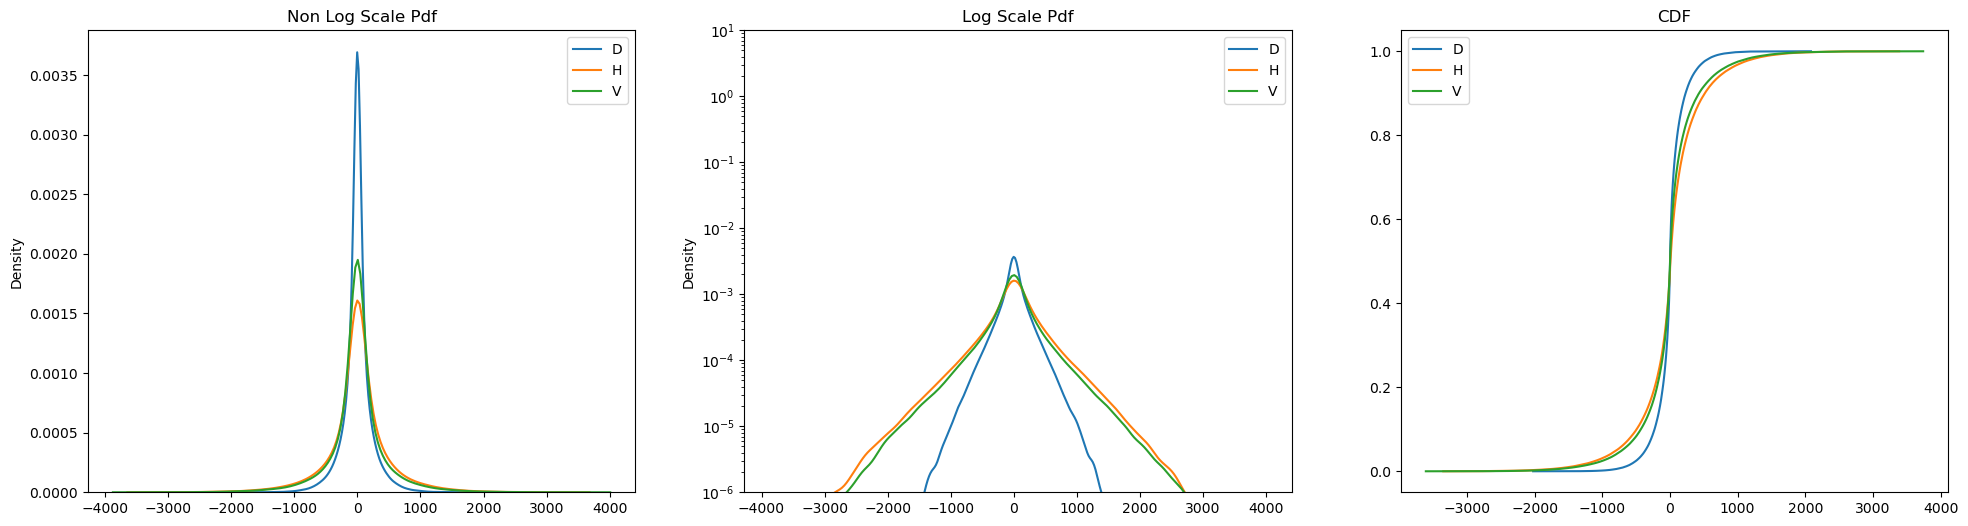

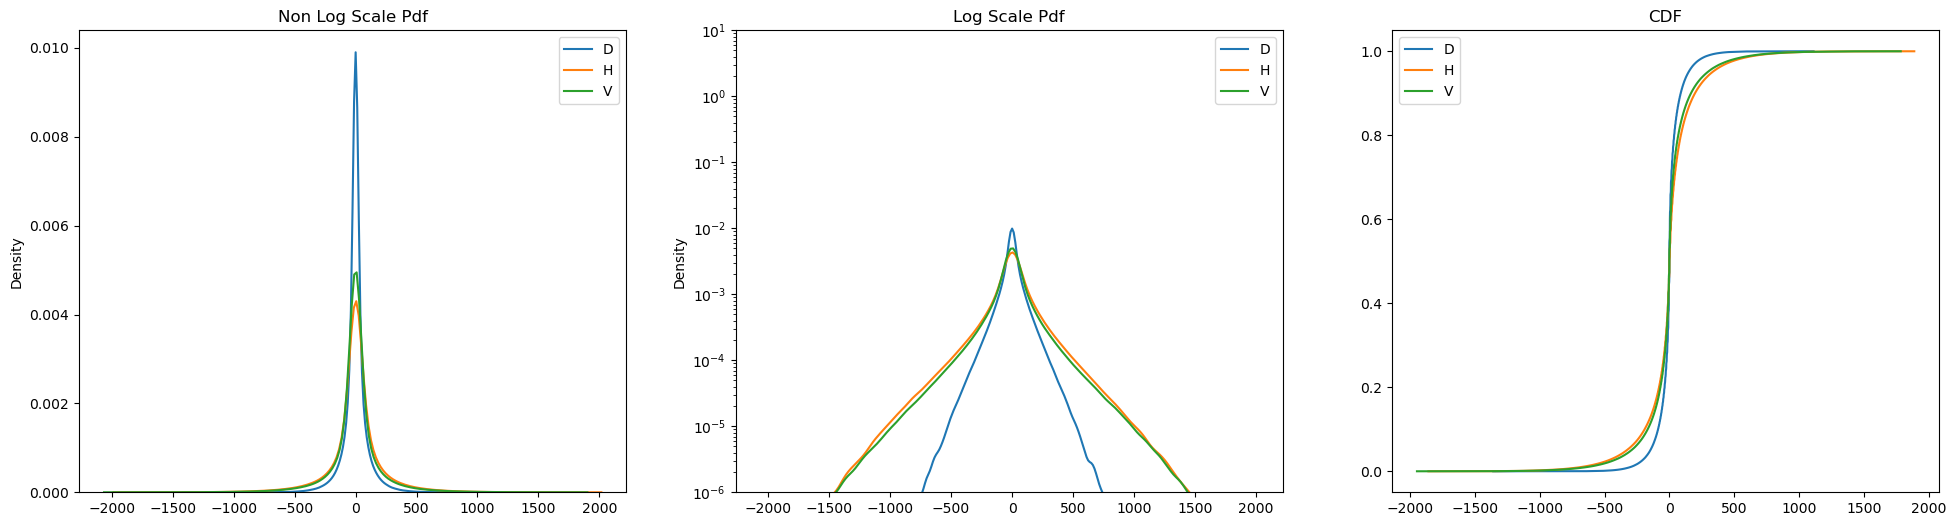

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


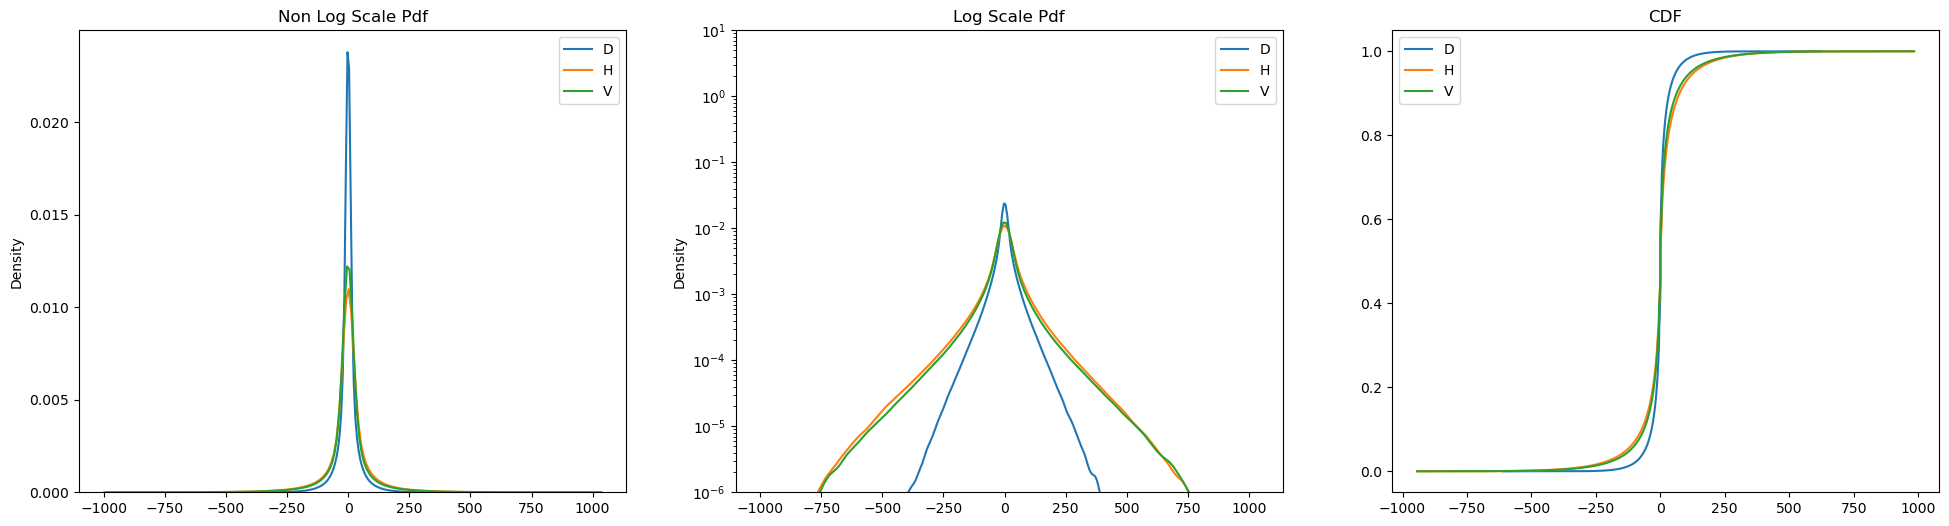

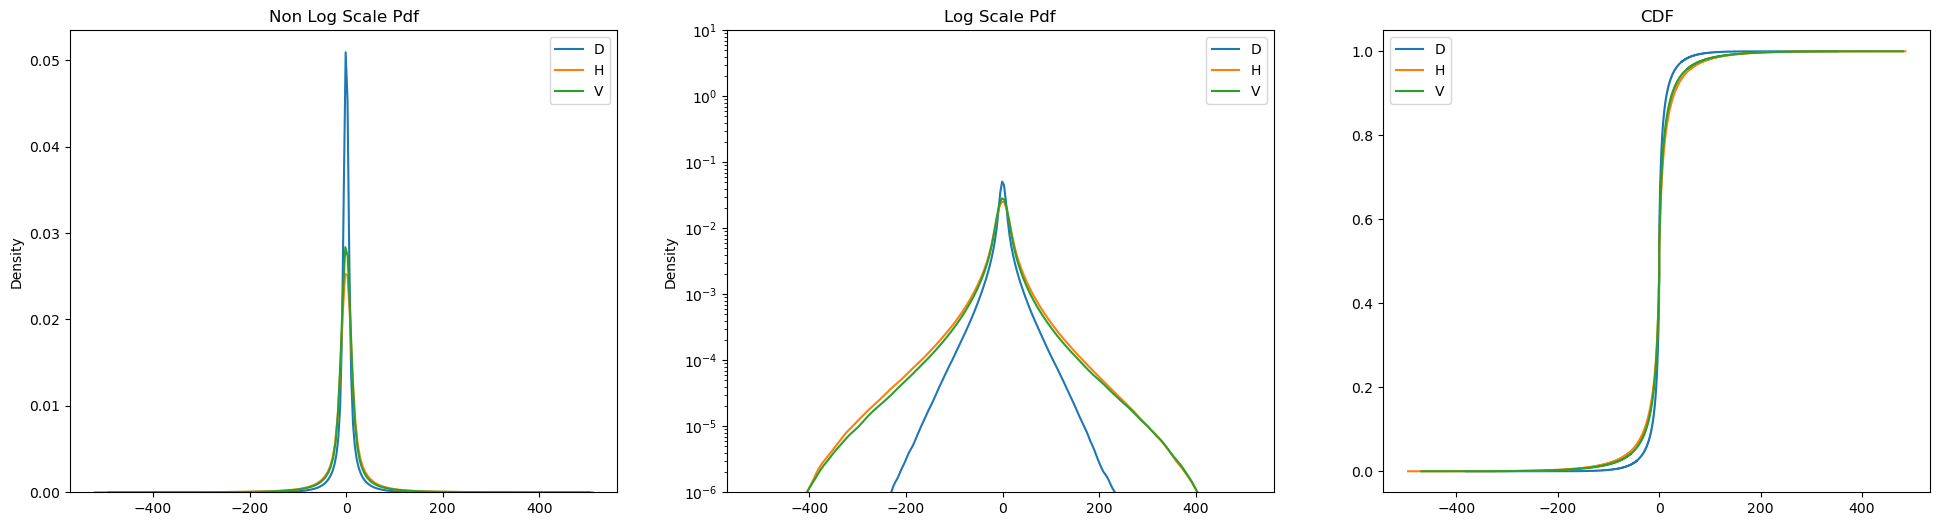

In [8]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


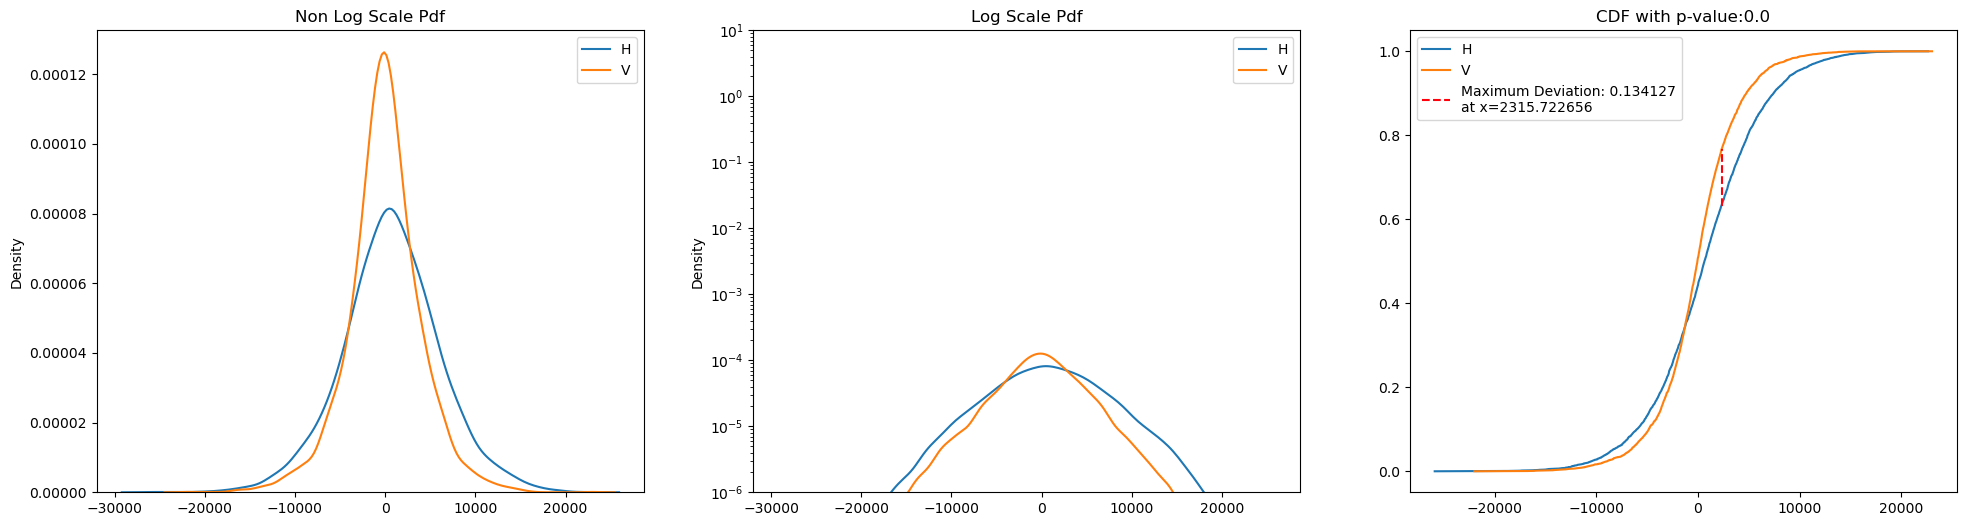

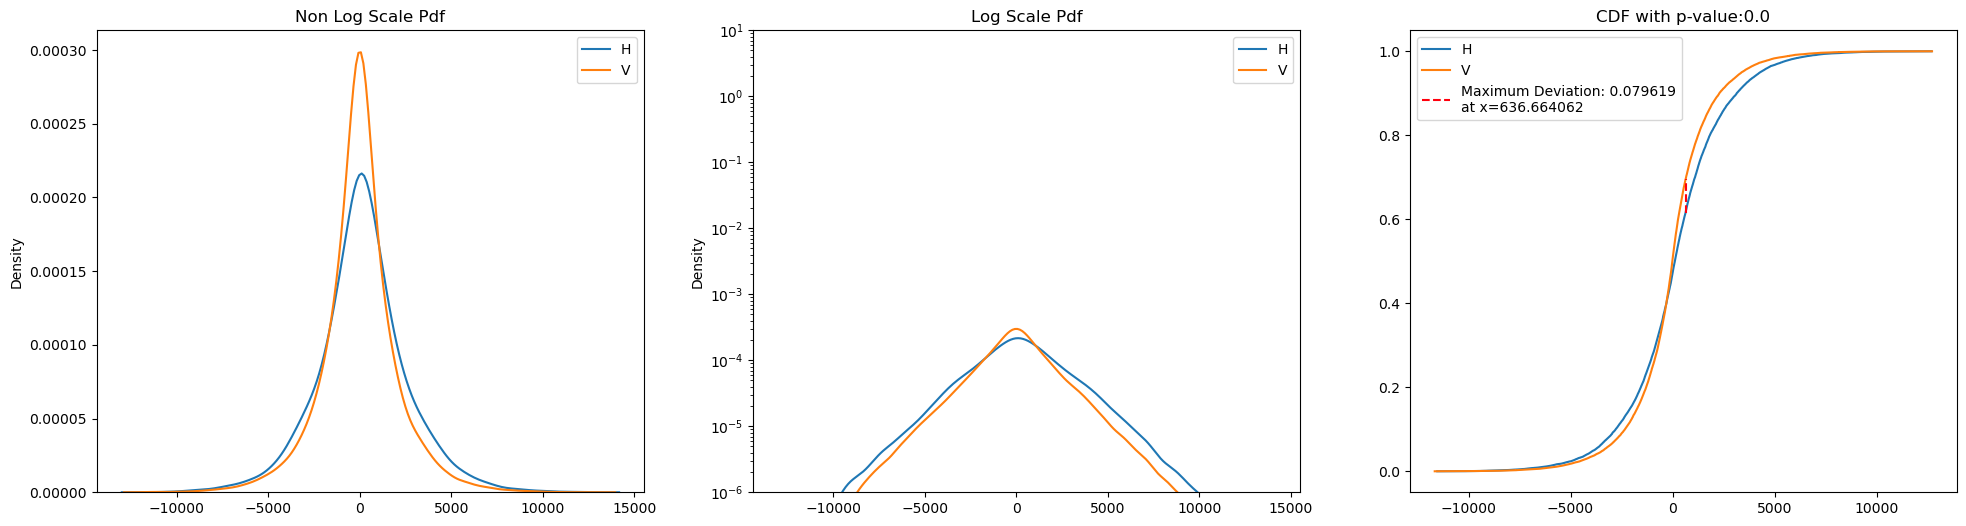

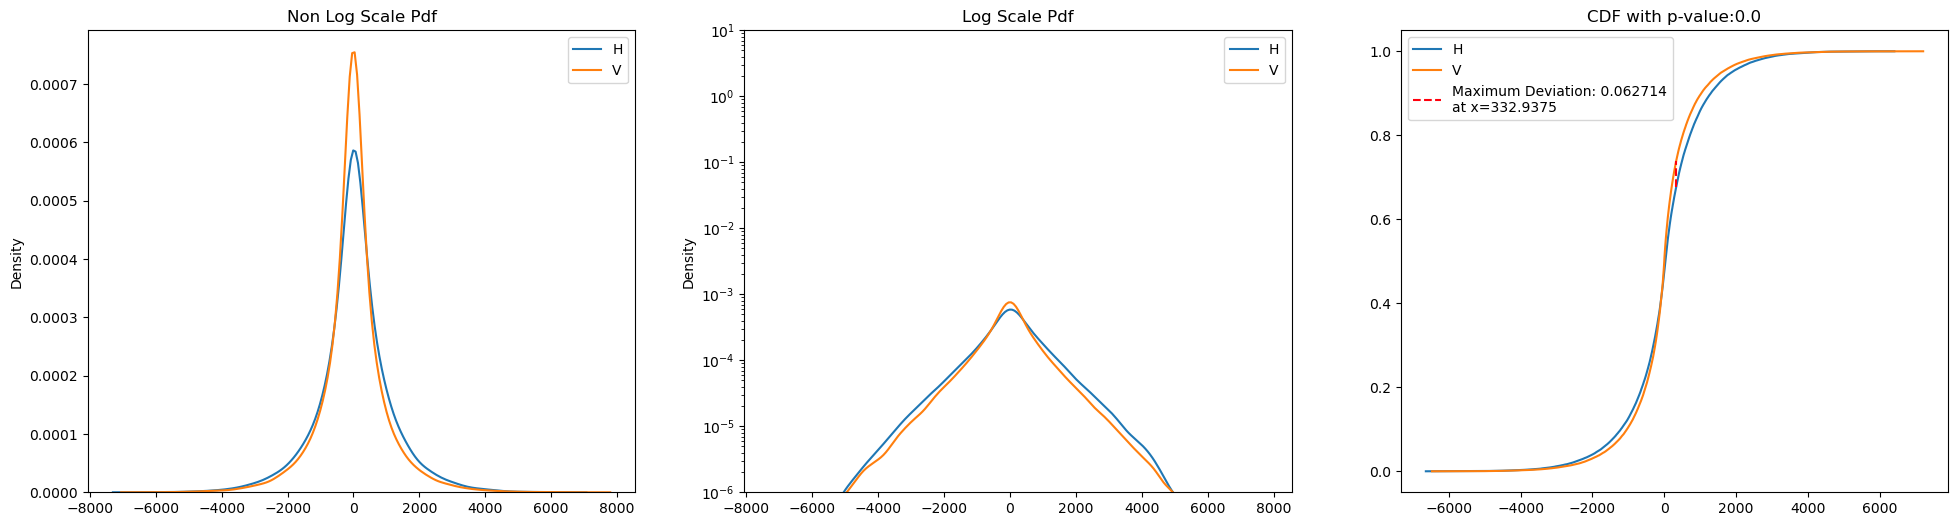

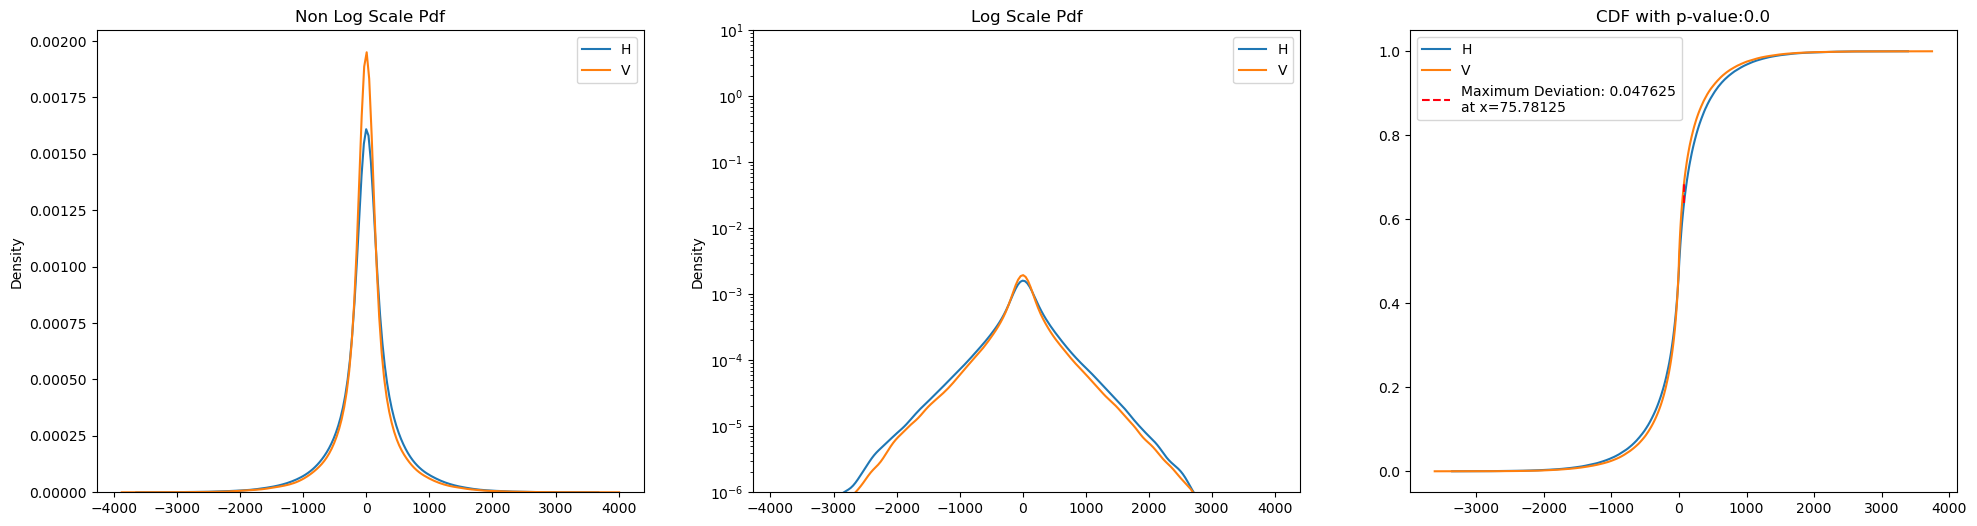

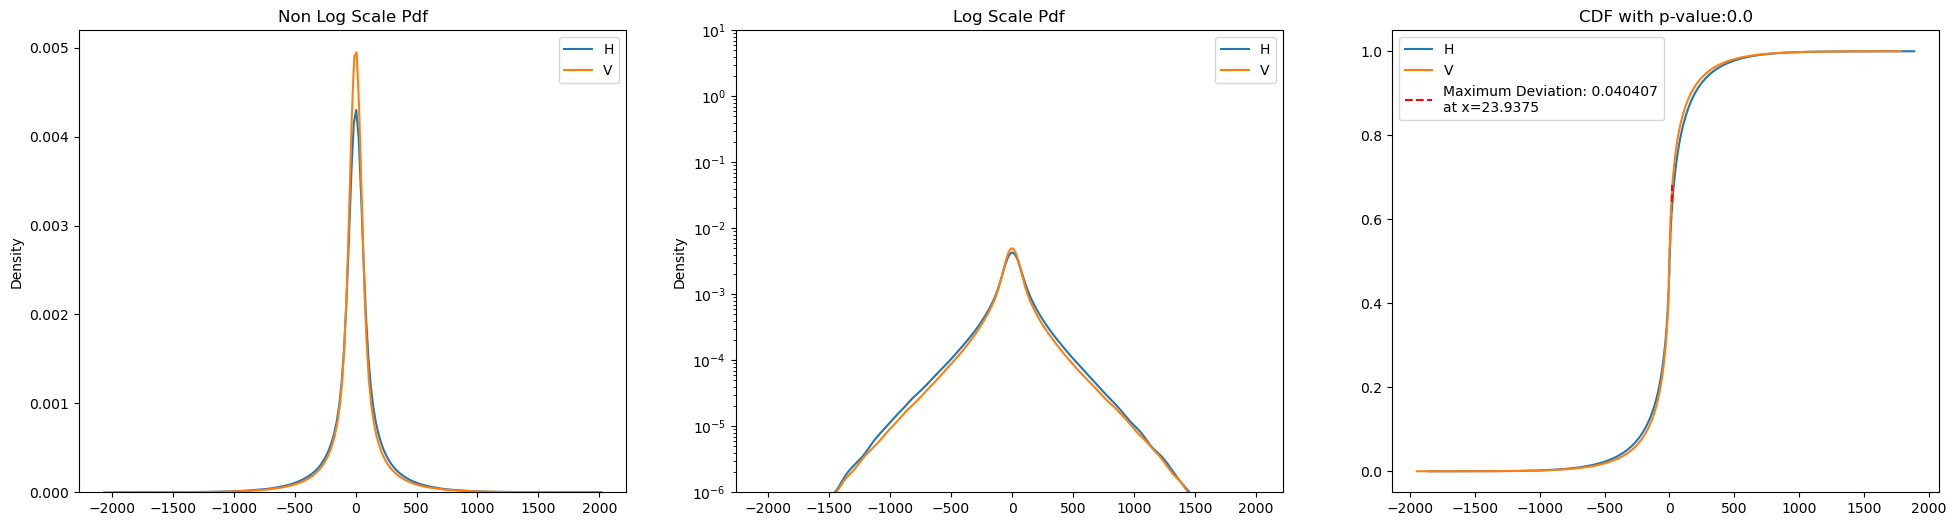

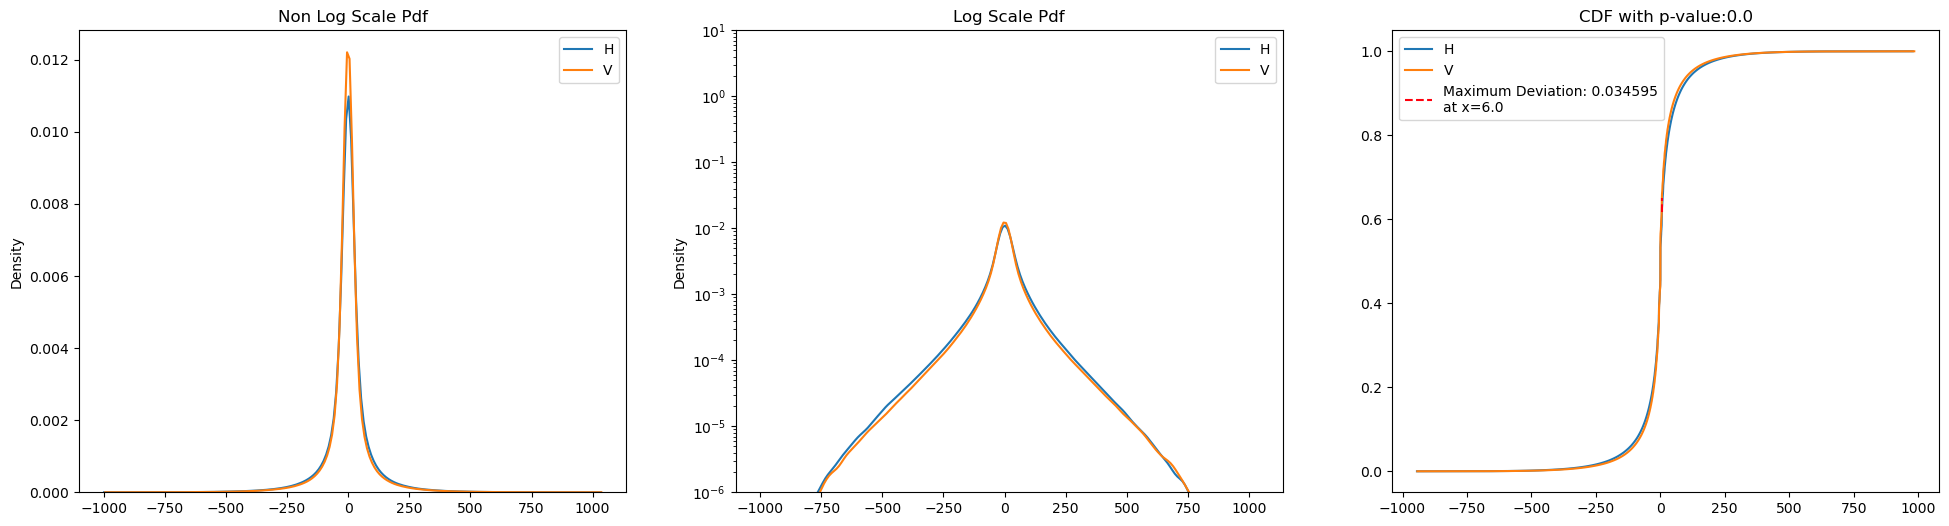

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


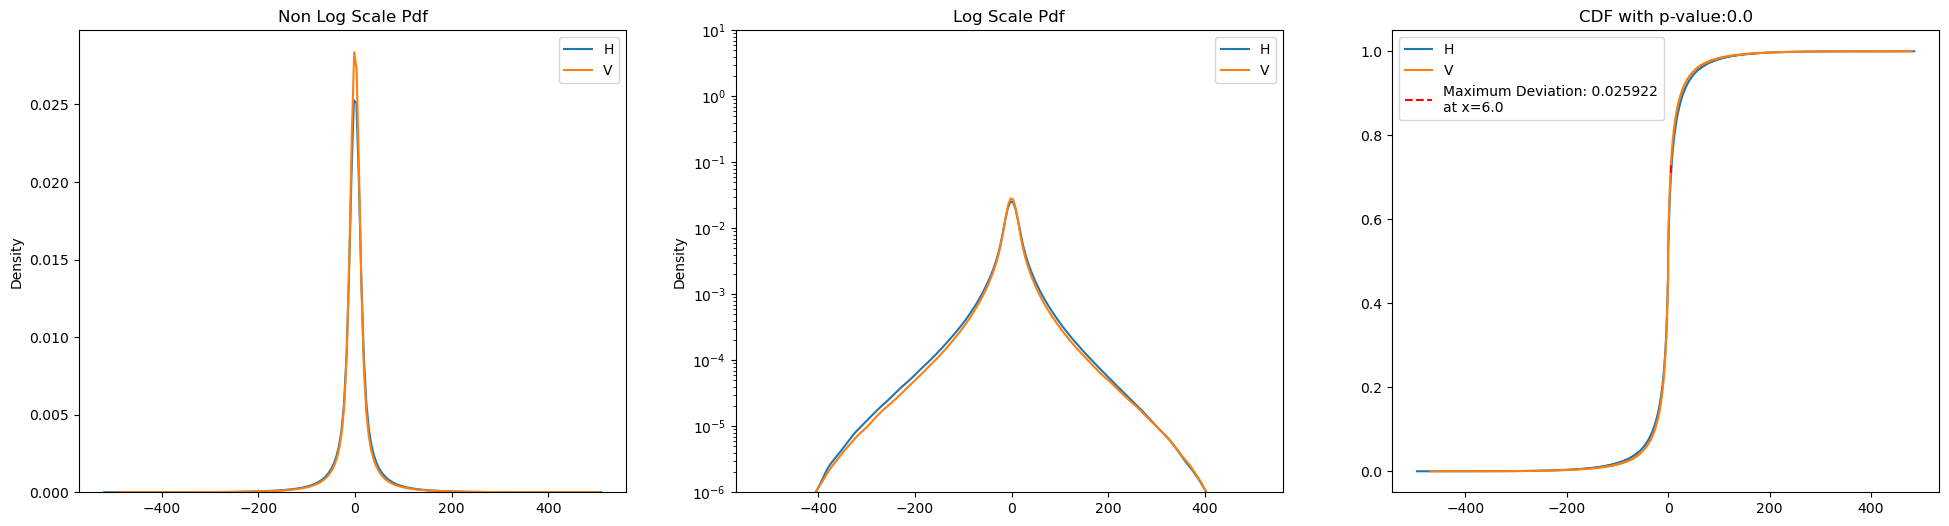

In [9]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Green

In [11]:
green_wv = convert_to_wavelet_basis(data_dir, "green", debug=True, image_opener = npz_opener_pil)
green_wv.head()

9 layers being used


100%|██████████| 4958/4958 [00:08<00:00, 586.90it/s]


channel  layer  frequency orientation  \
0   green      1   0.110679          L1   
1   green      2   0.124514           D   
2   green      2   0.124514           H   
3   green      2   0.124514           V   
4   green      3   0.142301           D   

                                                data  
0  [23108.886718750025, 43969.59375000005, 27630....  
1  [4908.1601562500055, 269.27343750000017, 227.7...  
2  [-1528.3398437500002, 14733.171875000016, -241...  
3  [-3526.2695312500014, 26.39843749999899, -2296...  
4  [-1616.734375000002, 2283.703125000002, 1292.9...

In [12]:
green_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    green_df = pd.concat([green_df, ks_df], axis = 0)
green_df

/var/folders/jd/4sjpm6q97knfqgwsf50gr3jh0000gn/T/ipykernel_15835/3122142642.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  green_df = pd.concat([green_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
1     2     D      V  0.097418   6.851361e-21
2     2     H      V  0.153086   4.421535e-51
0     2     D      H  0.232957  2.393783e-118
2     3     H      V  0.090964   7.537217e-72
1     3     D      V  0.091569   8.360500e-73
0     3     D      H  0.176482  1.283996e-270
2     4     H      V  0.066836  1.697697e-154
1     4     D      V  0.086023  8.276864e-256
0     4     D      H  0.143758   0.000000e+00
2     5     H      V  0.052151   0.000000e+00
1     5     D      V  0.078973   0.000000e+00
0     5     D      H  0.123919   0.000000e+00
2     6     H      V  0.040067   0.000000e+00
1     6     D      V  0.073065   0.000000e+00
0     6     D      H  0.110216   0.000000e+00
2     7     H      V  0.033146   0.000000e+00
1     7     D      V  0.074954   0.000000e+00
0     7     D      H  0.102259   0.000000e+00
2     8     H      V  0.025101   0.000000e+00
1     8     D      V  0.060523   0.000000e+00
0     8     D      H  0.084786   0.000000e+00

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


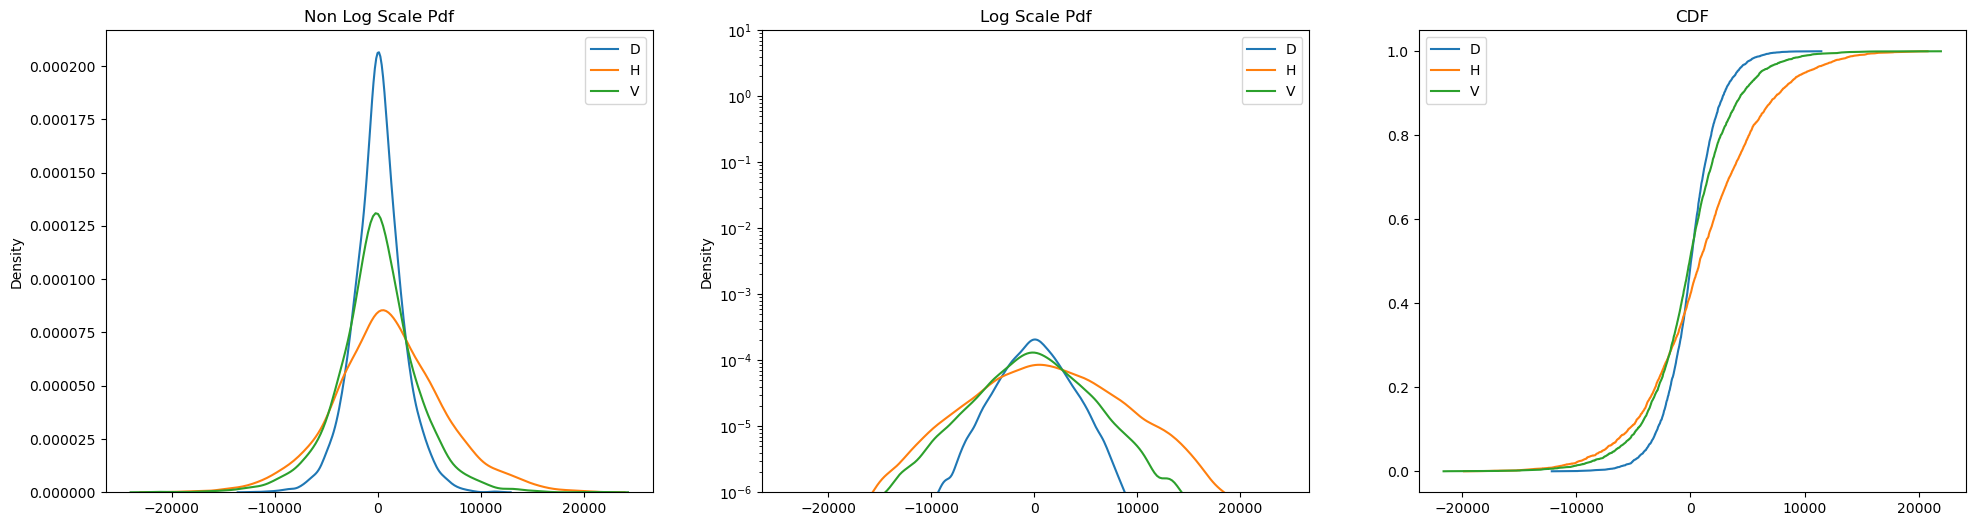

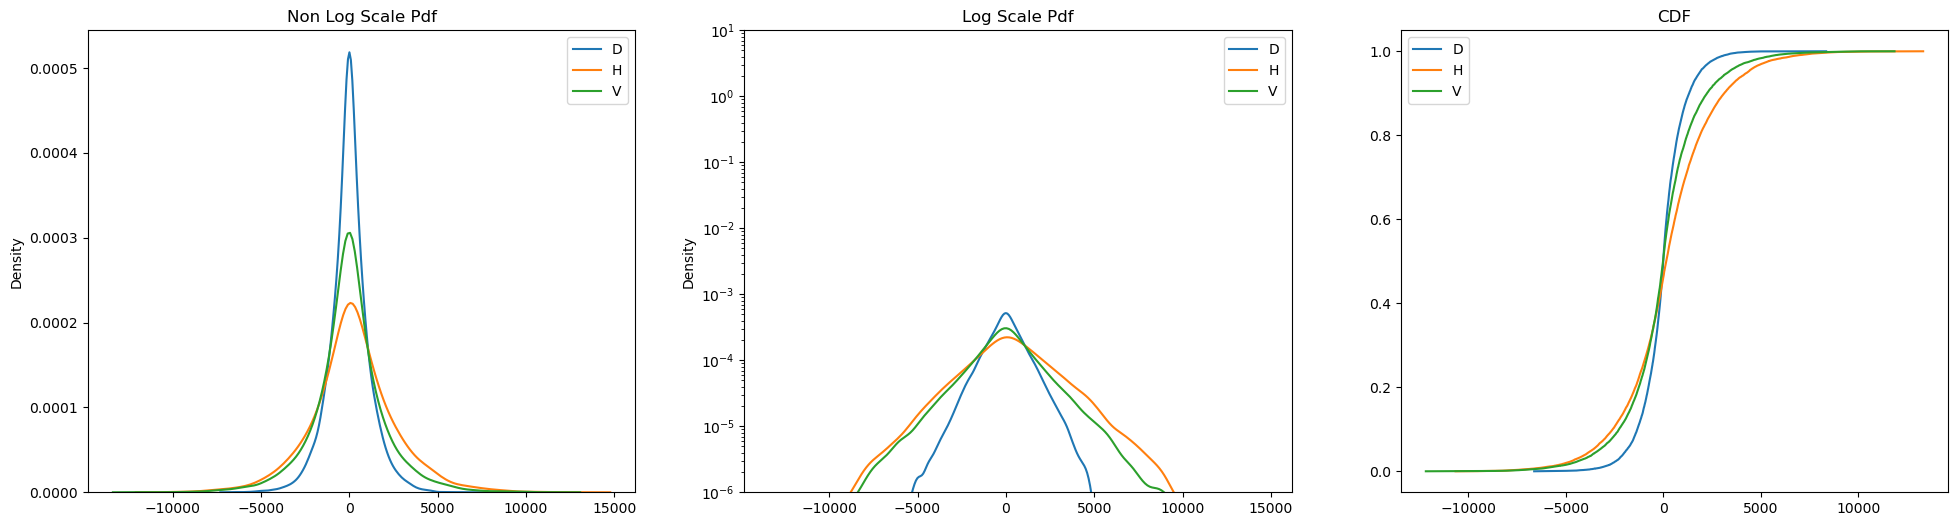

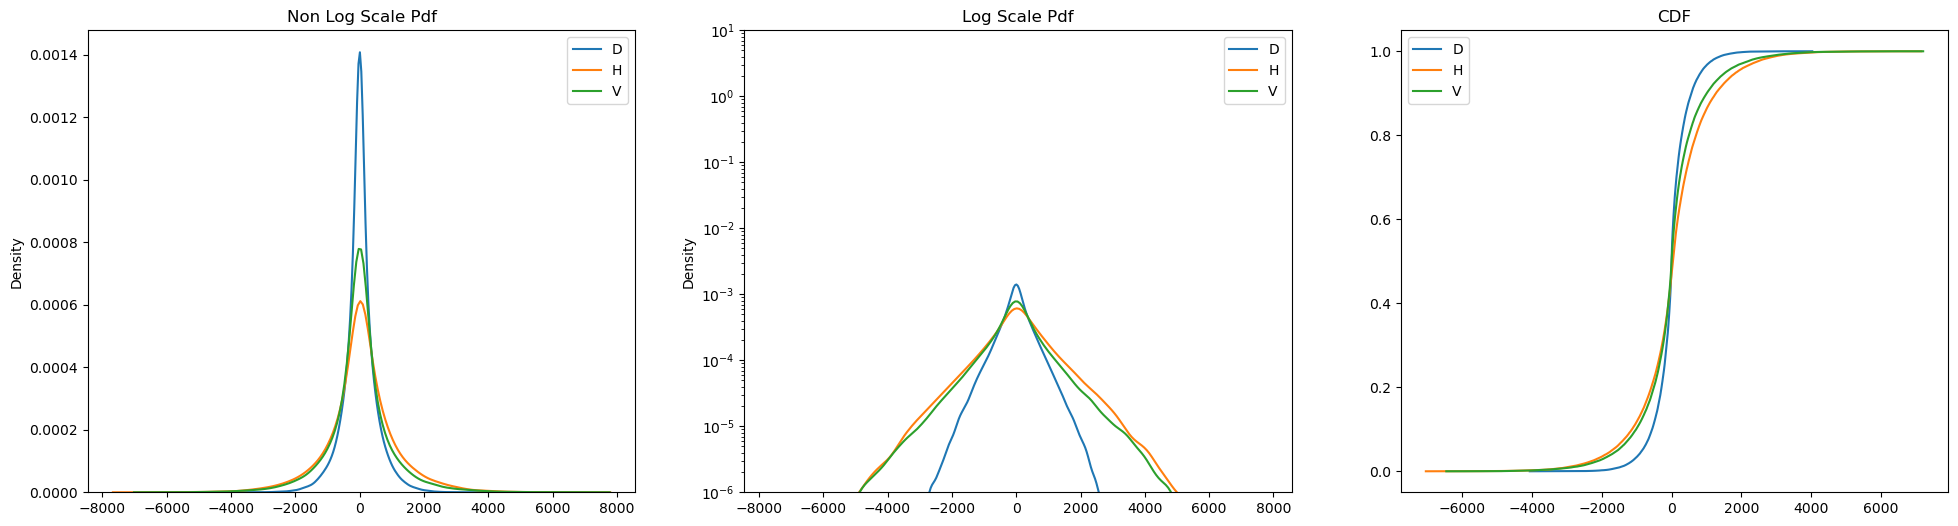

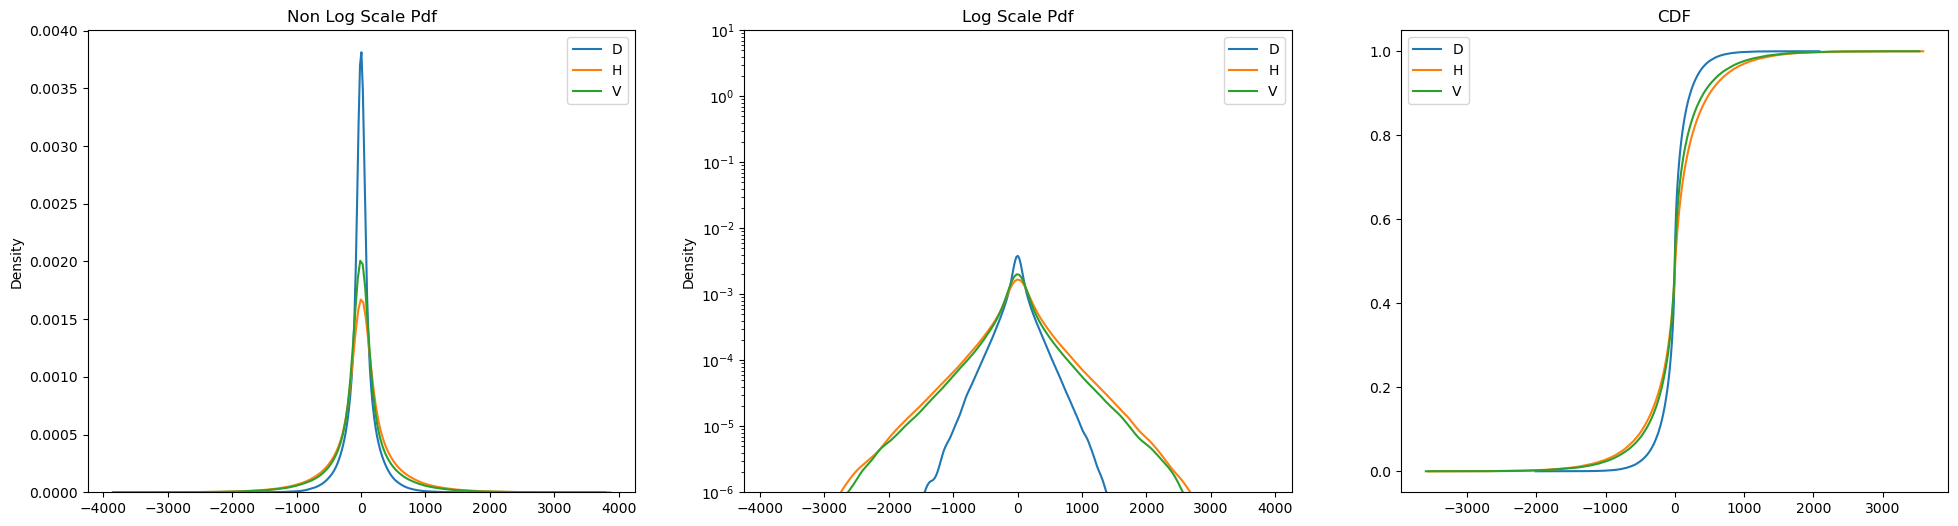

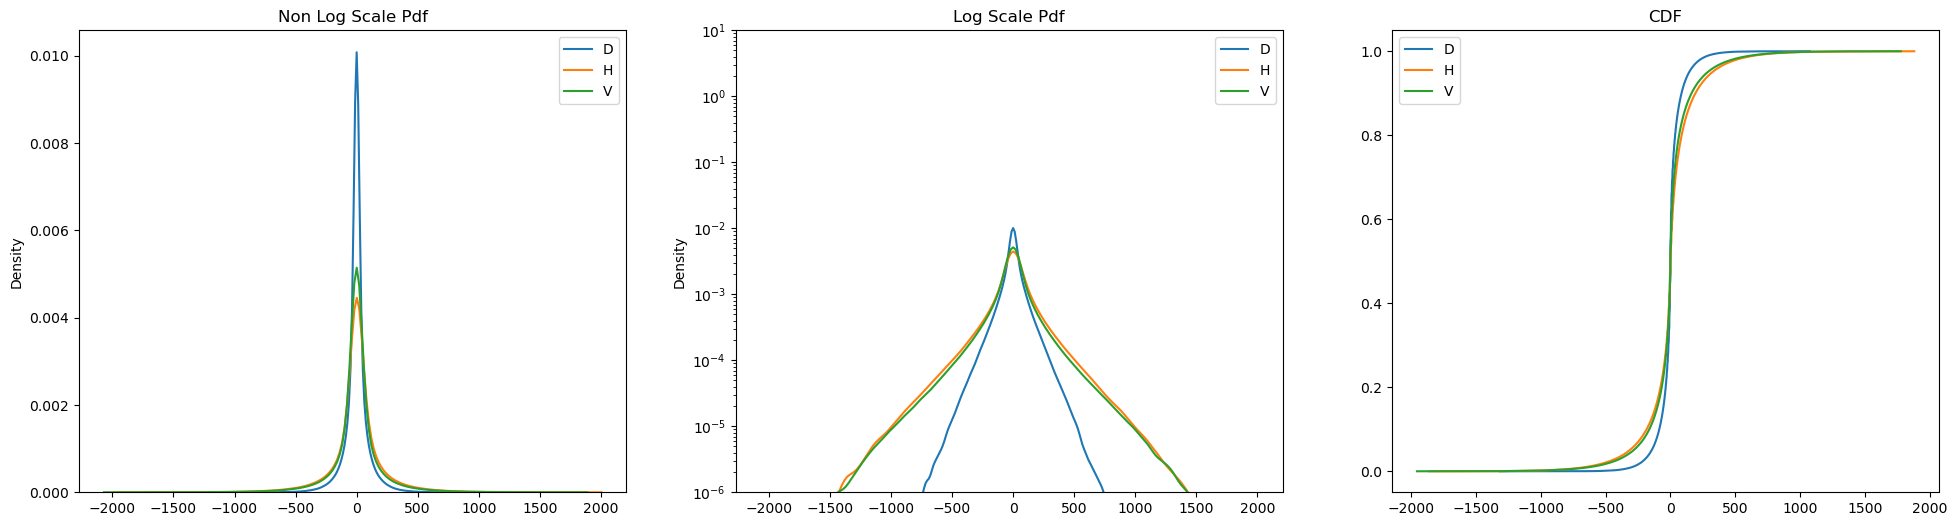

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


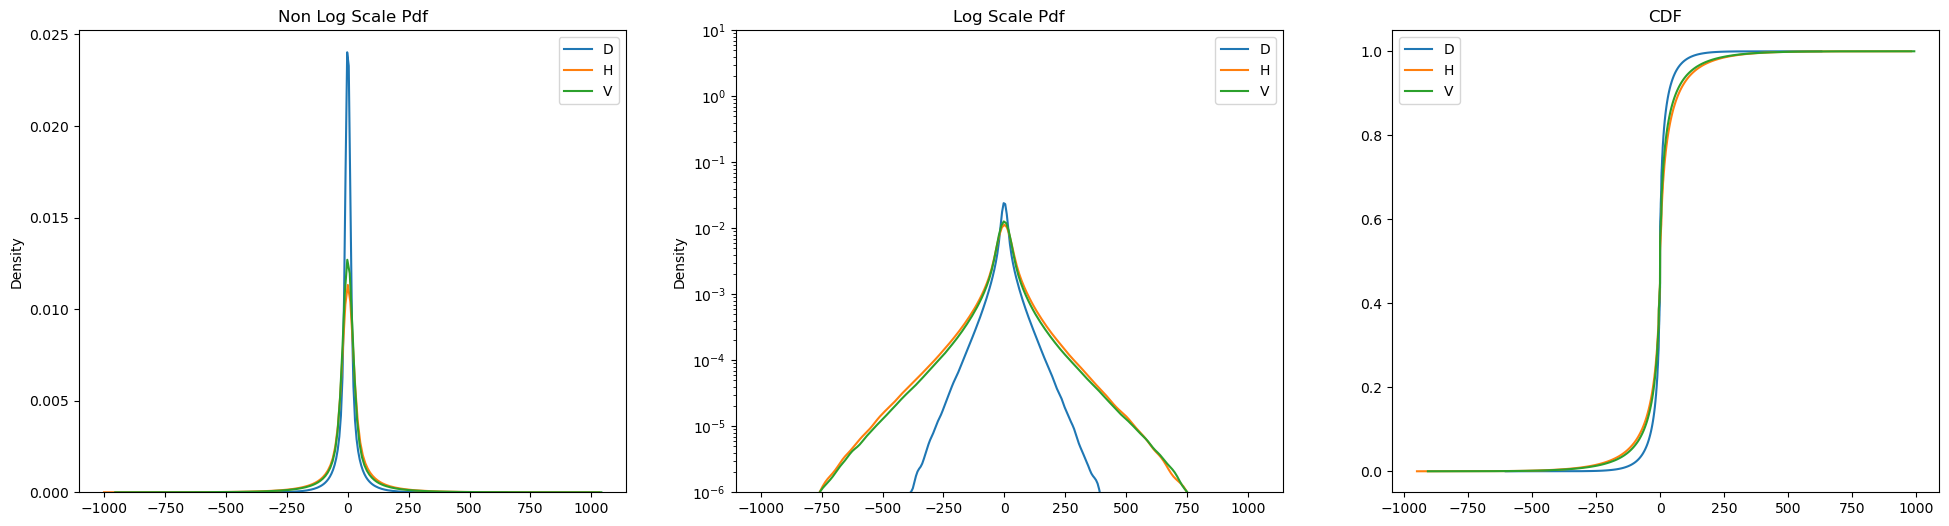

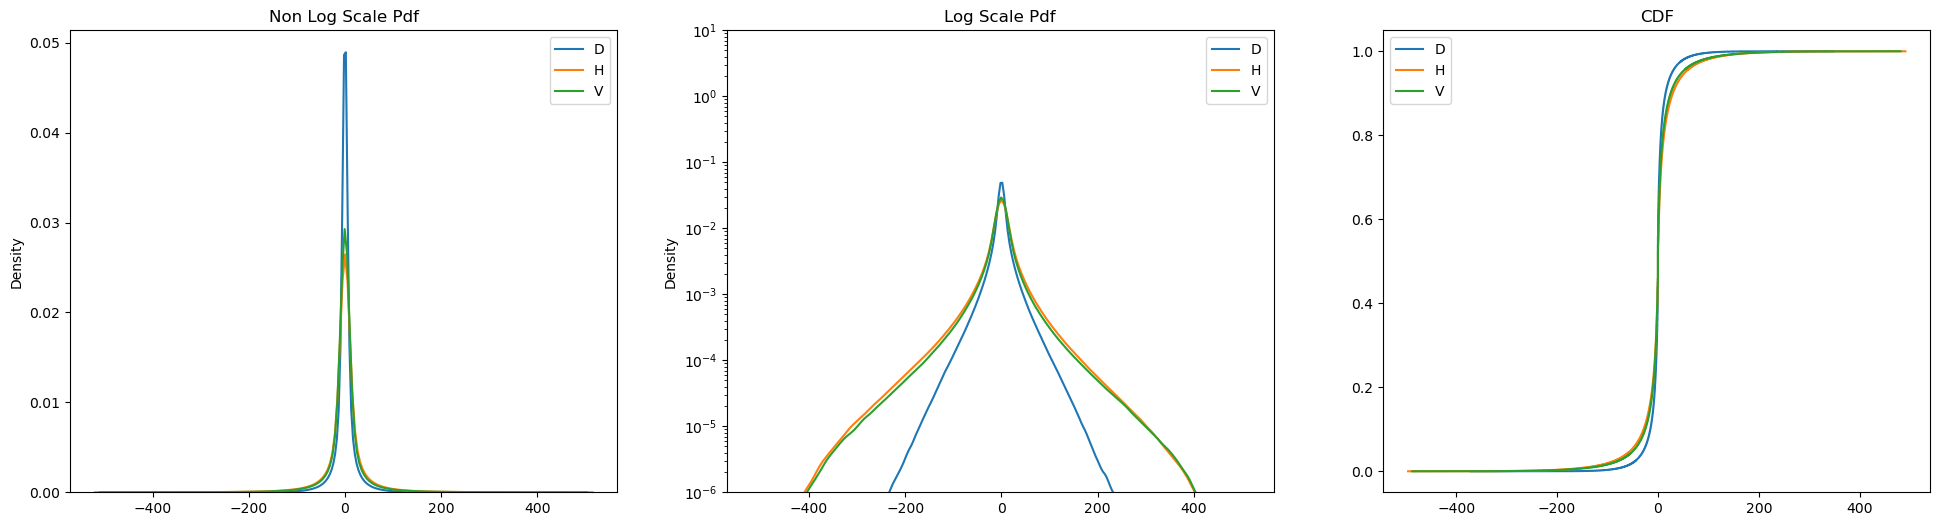

In [13]:
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


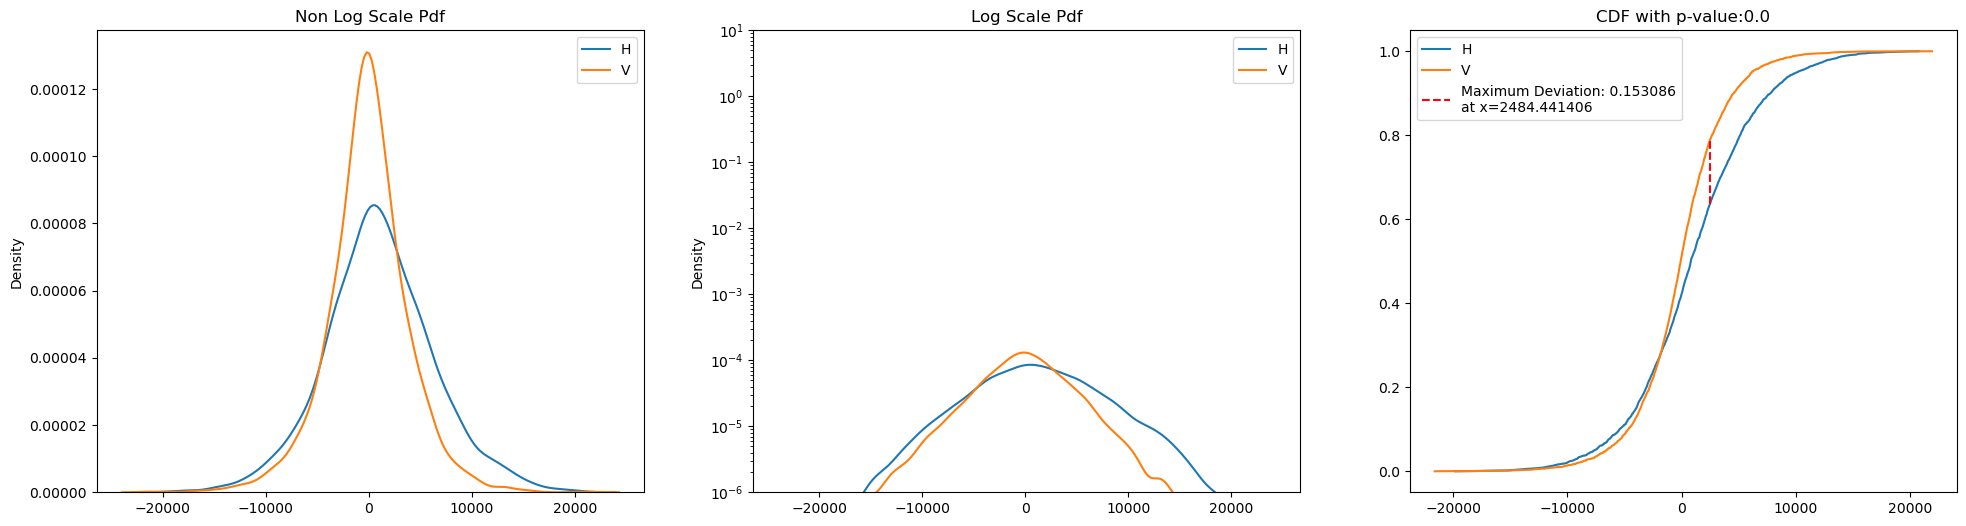

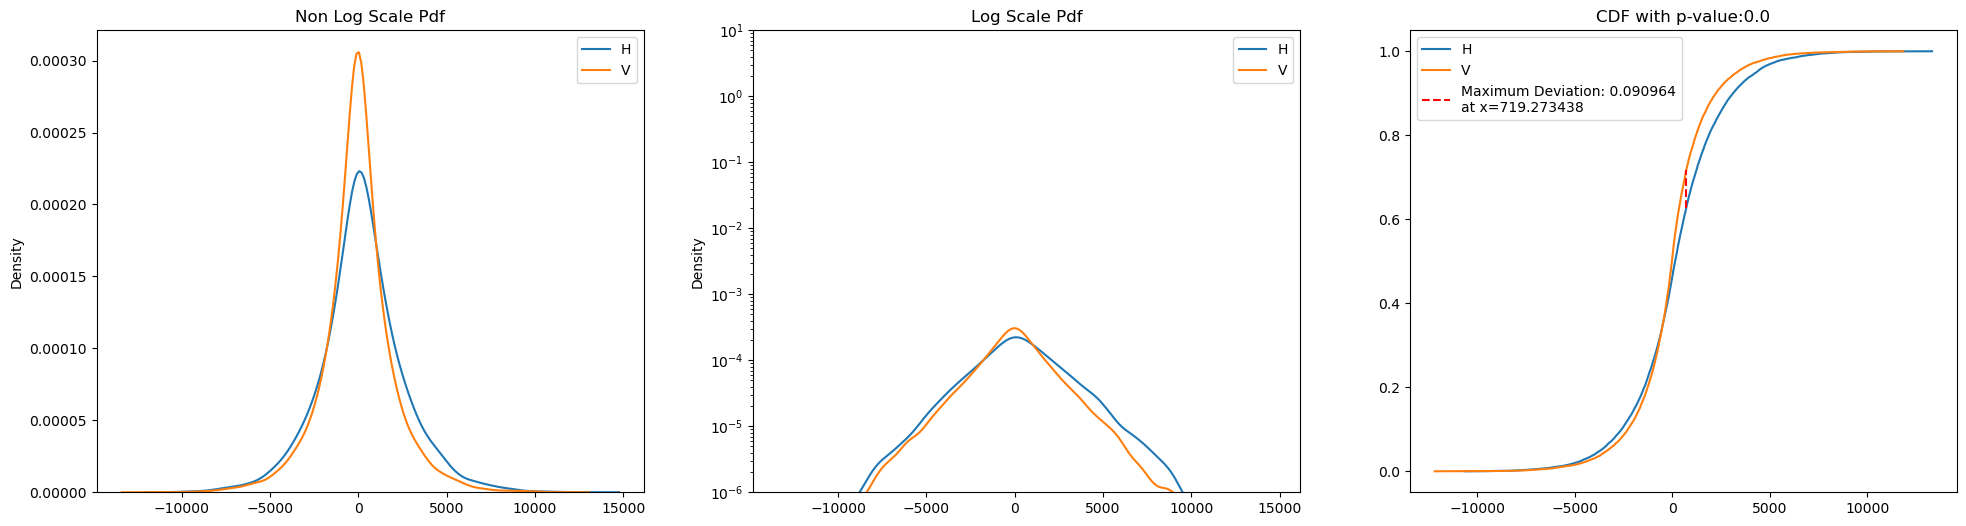

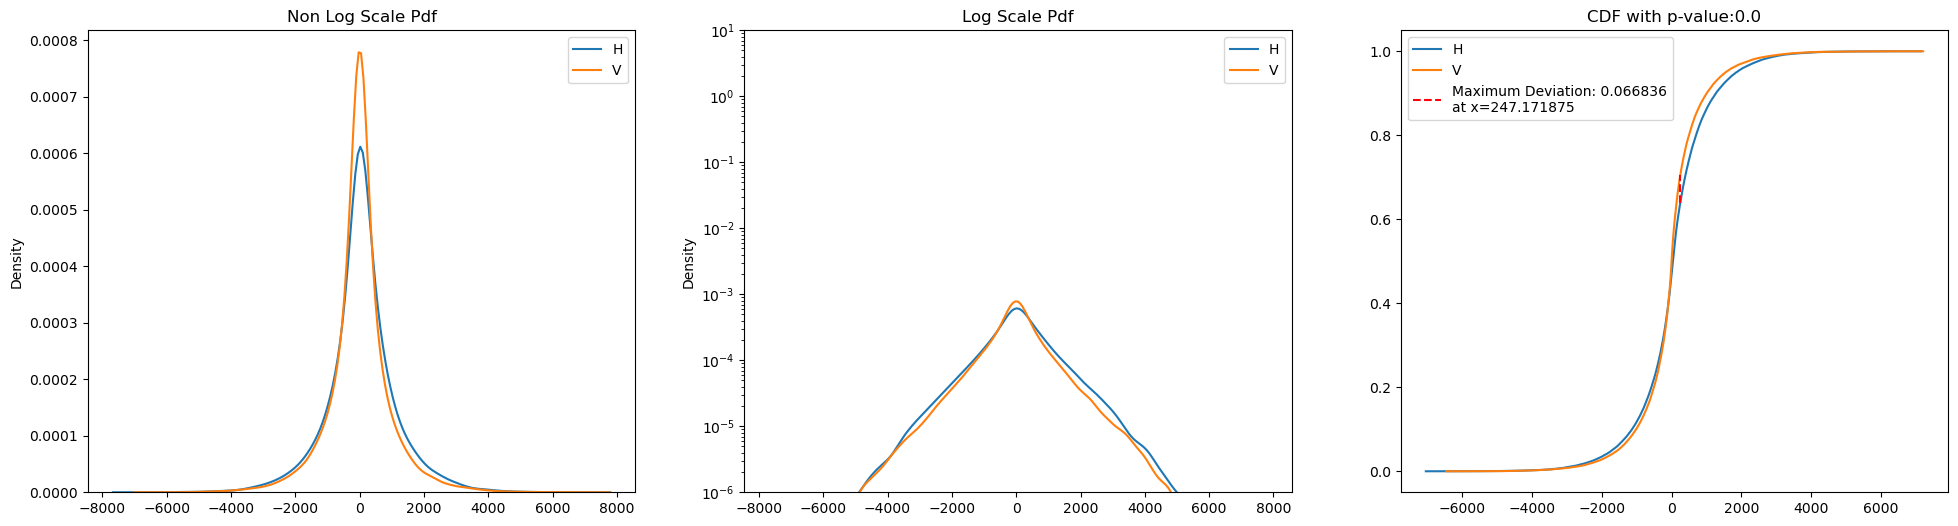

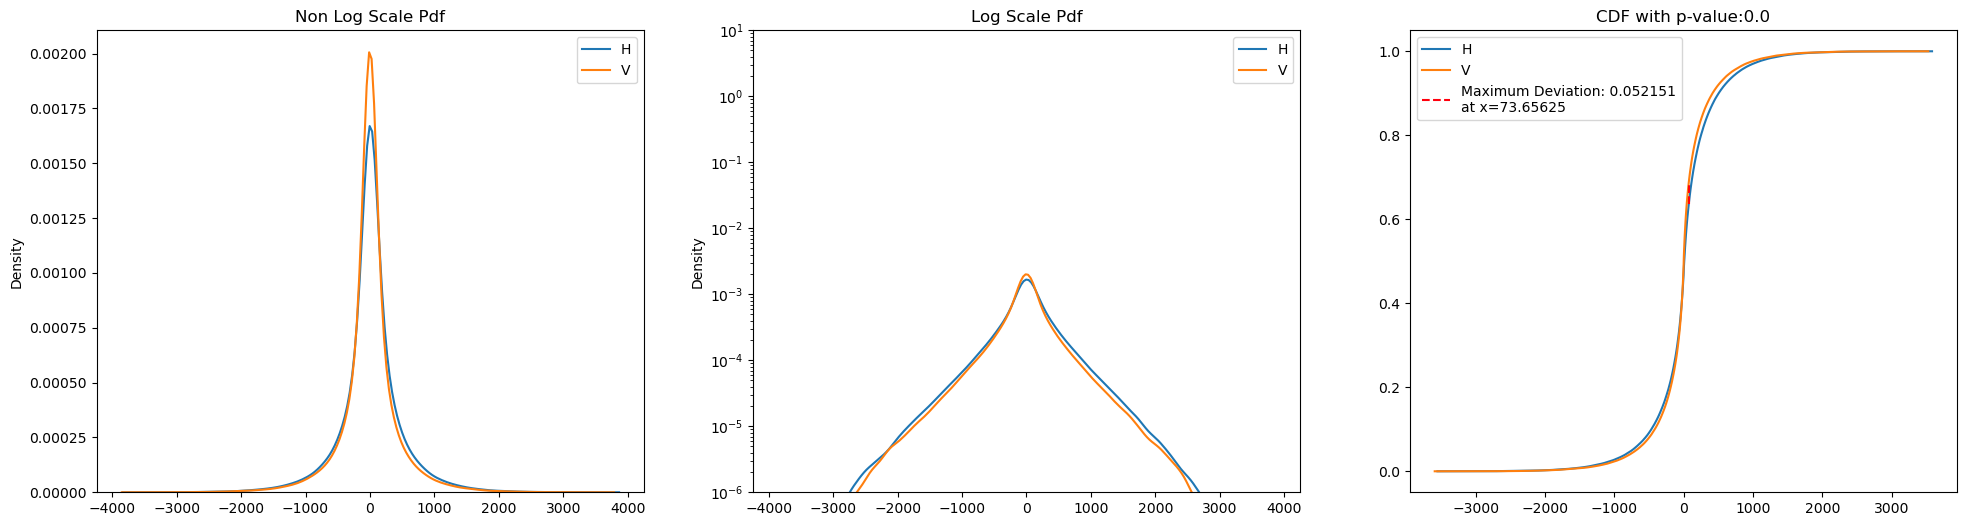

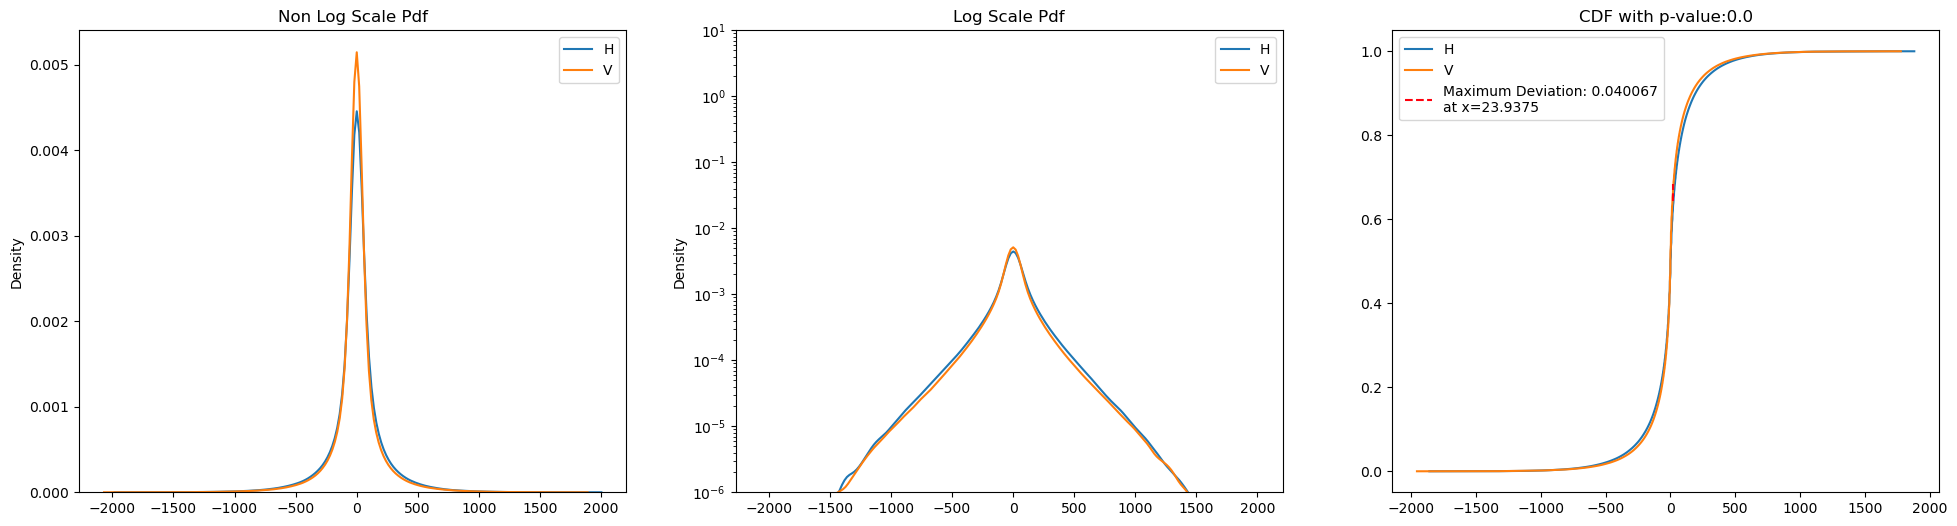

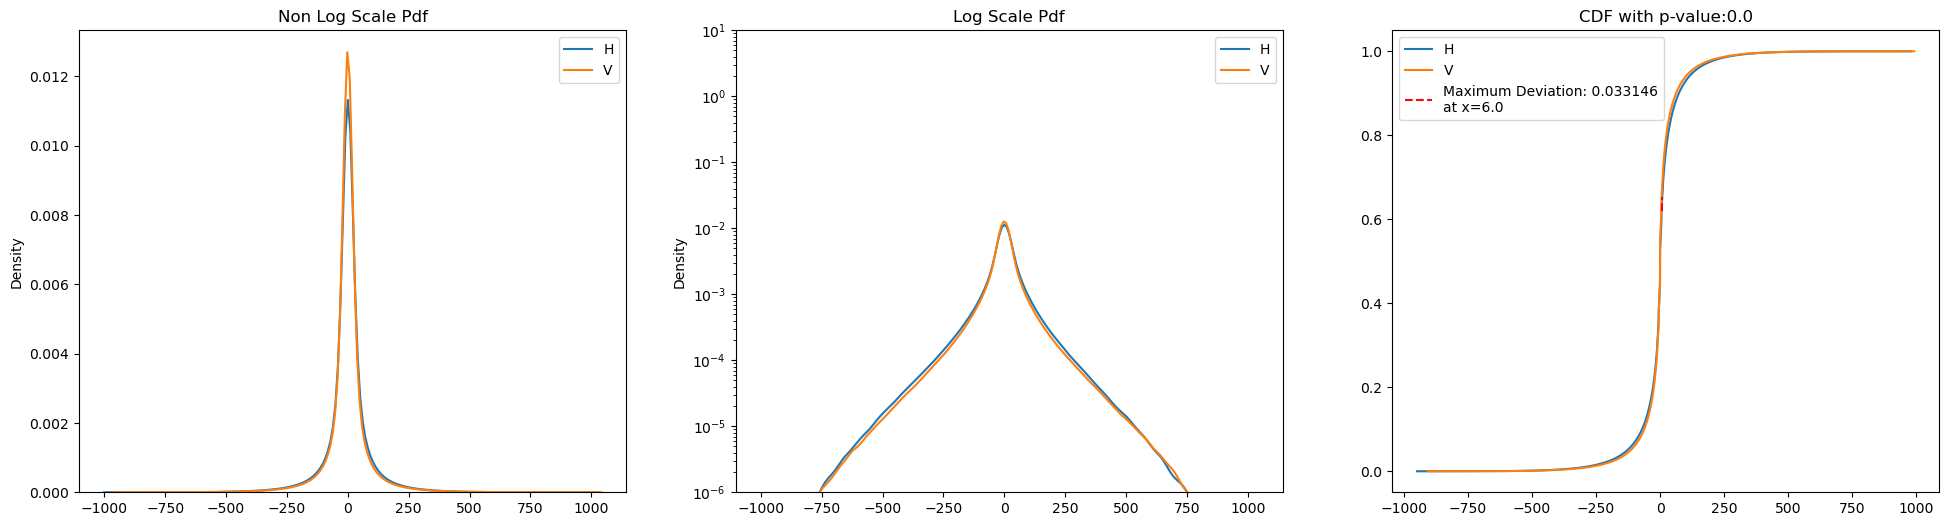

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


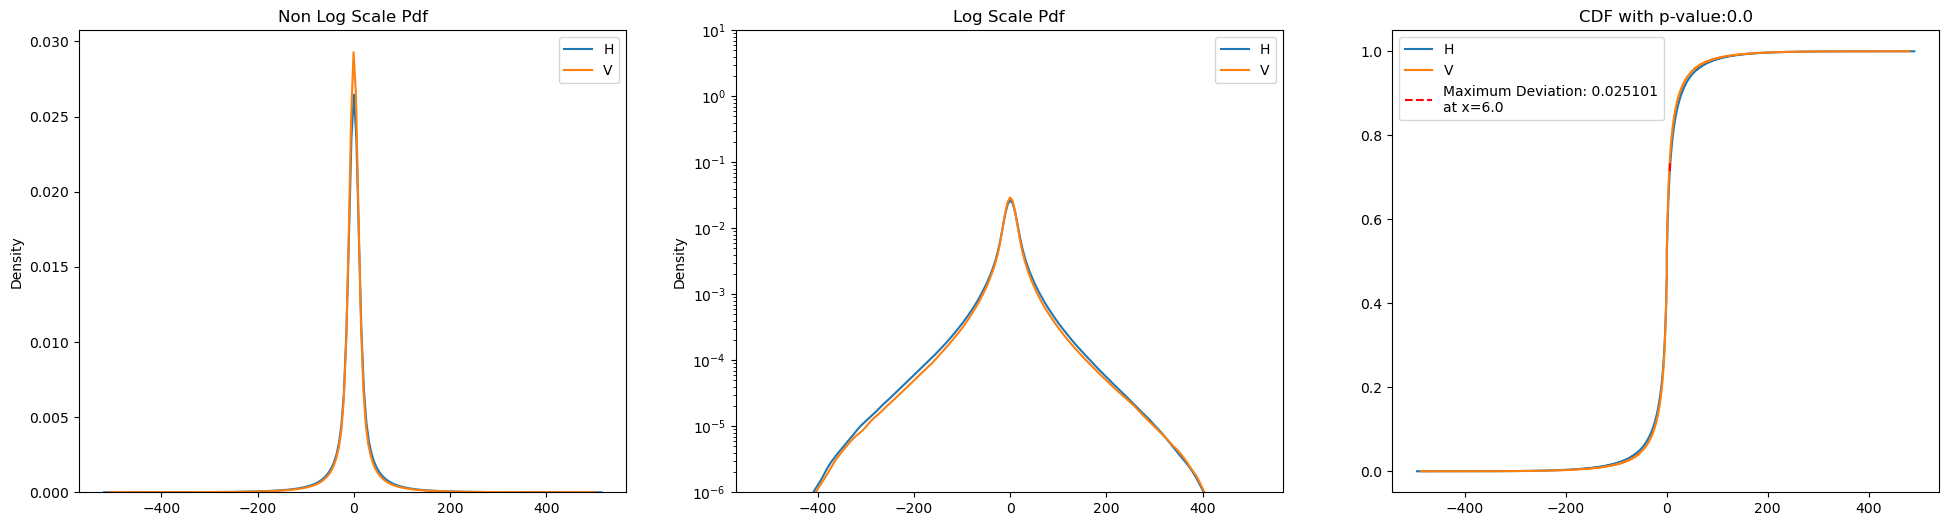

In [14]:
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Blue

In [15]:
blue_wv = convert_to_wavelet_basis(data_dir, "blue", debug=True, image_opener = npz_opener_pil)
blue_wv.head()

9 layers being used


100%|██████████| 4958/4958 [00:08<00:00, 618.89it/s]


channel  layer  frequency orientation  \
0    blue      1   0.110679          L1   
1    blue      2   0.124514           D   
2    blue      2   0.124514           H   
3    blue      2   0.124514           V   
4    blue      3   0.142301           D   

                                                data  
0  [22670.054687500025, 42524.62109375005, 28226....  
1  [2713.8046875000036, -2485.3398437499995, 377....  
2  [-785.6640625000009, 16438.37890625002, -519.5...  
3  [-1392.8671875000034, -993.3007812500008, -252...  
4  [-1975.679687500002, 1450.9609375000016, 1306....

In [16]:
blue_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    blue_df = pd.concat([blue_df, ks_df], axis = 0)
blue_df

/var/folders/jd/4sjpm6q97knfqgwsf50gr3jh0000gn/T/ipykernel_15835/3852482873.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  blue_df = pd.concat([blue_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
1     2     D      V  0.093183   3.794990e-19
2     2     H      V  0.152077   2.057662e-50
0     2     D      H  0.235579  4.831059e-121
1     3     D      V  0.086829   1.707157e-65
2     3     H      V  0.096914   1.619857e-81
0     3     D      H  0.180214  3.005803e-282
2     4     H      V  0.070404  2.117836e-171
1     4     D      V  0.081295  1.794218e-228
0     4     D      H  0.144287   0.000000e+00
2     5     H      V  0.053572   0.000000e+00
1     5     D      V  0.074337   0.000000e+00
0     5     D      H  0.122548   0.000000e+00
2     6     H      V  0.043605   0.000000e+00
1     6     D      V  0.070450   0.000000e+00
0     6     D      H  0.107588   0.000000e+00
2     7     H      V  0.035398   0.000000e+00
1     7     D      V  0.075569   0.000000e+00
0     7     D      H  0.101969   0.000000e+00
2     8     H      V  0.026201   0.000000e+00
1     8     D      V  0.065819   0.000000e+00
0     8     D      H  0.090184   0.000000e+00

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


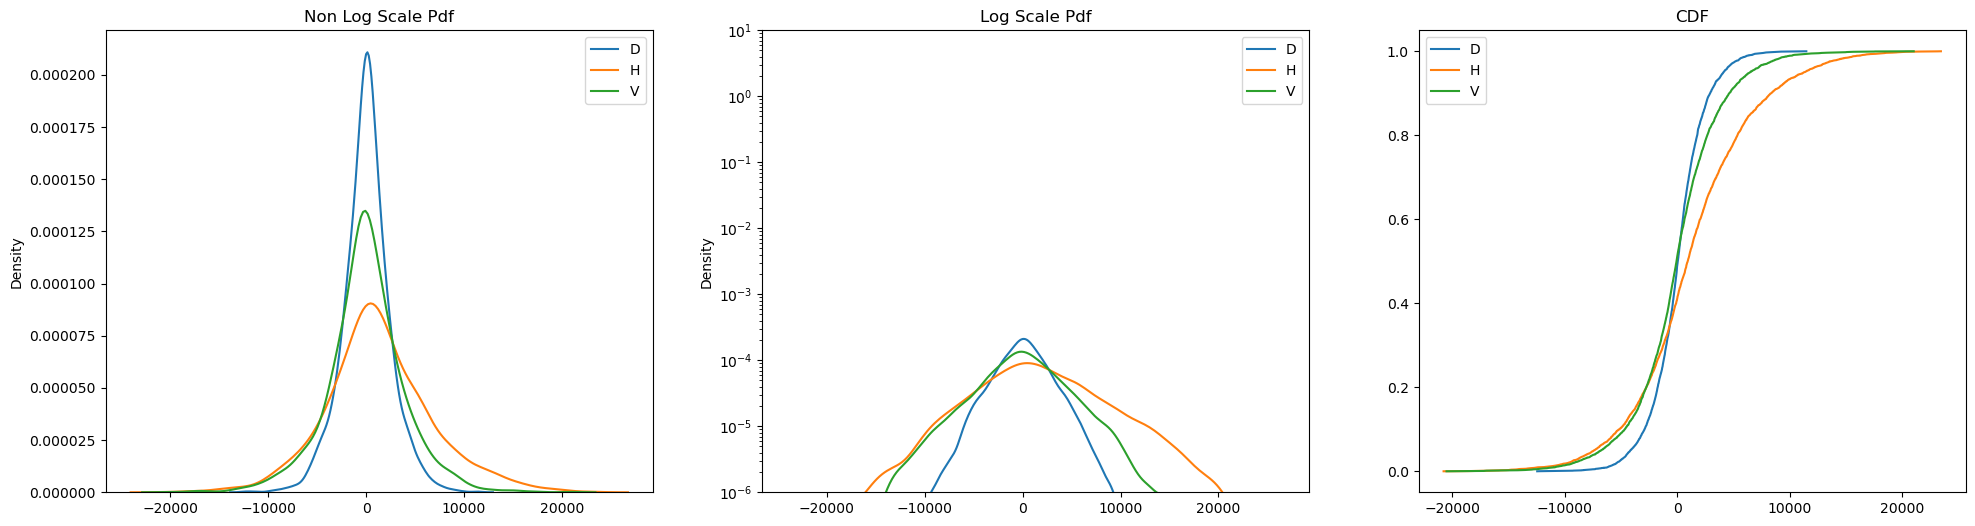

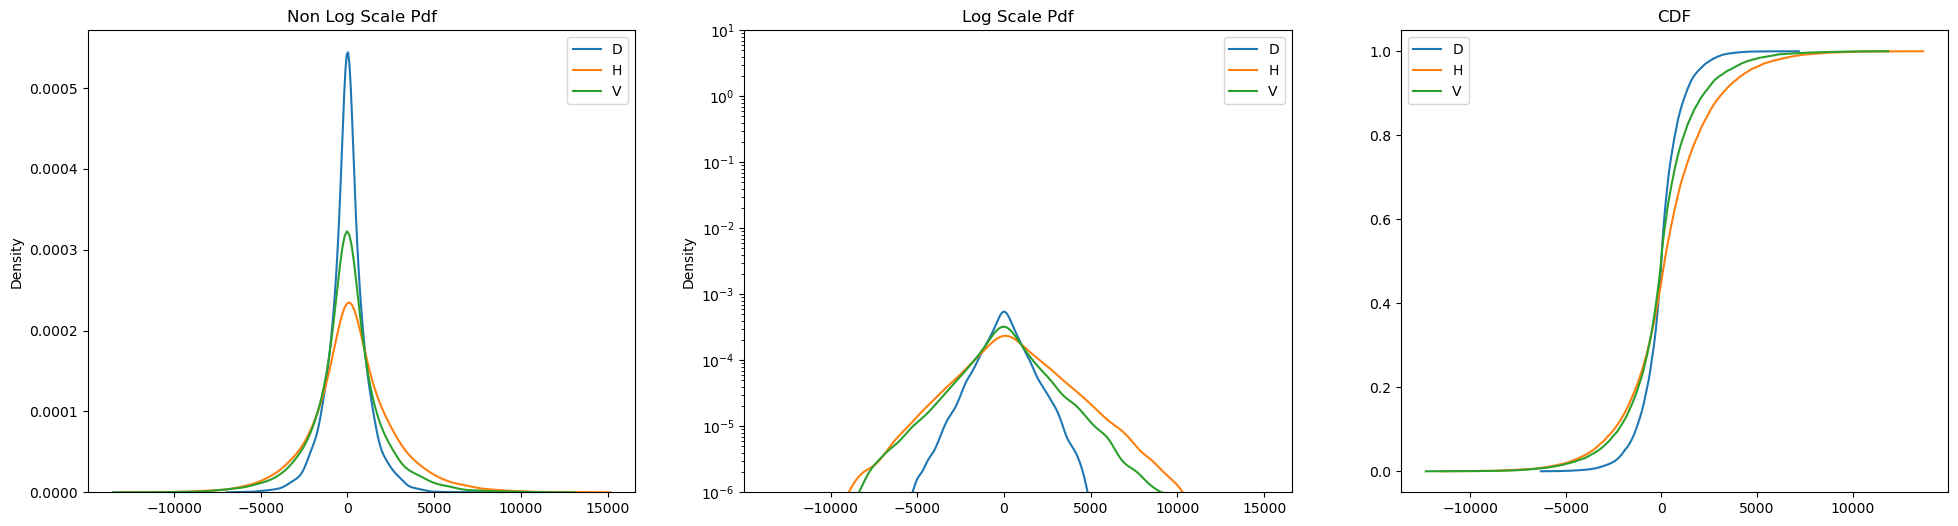

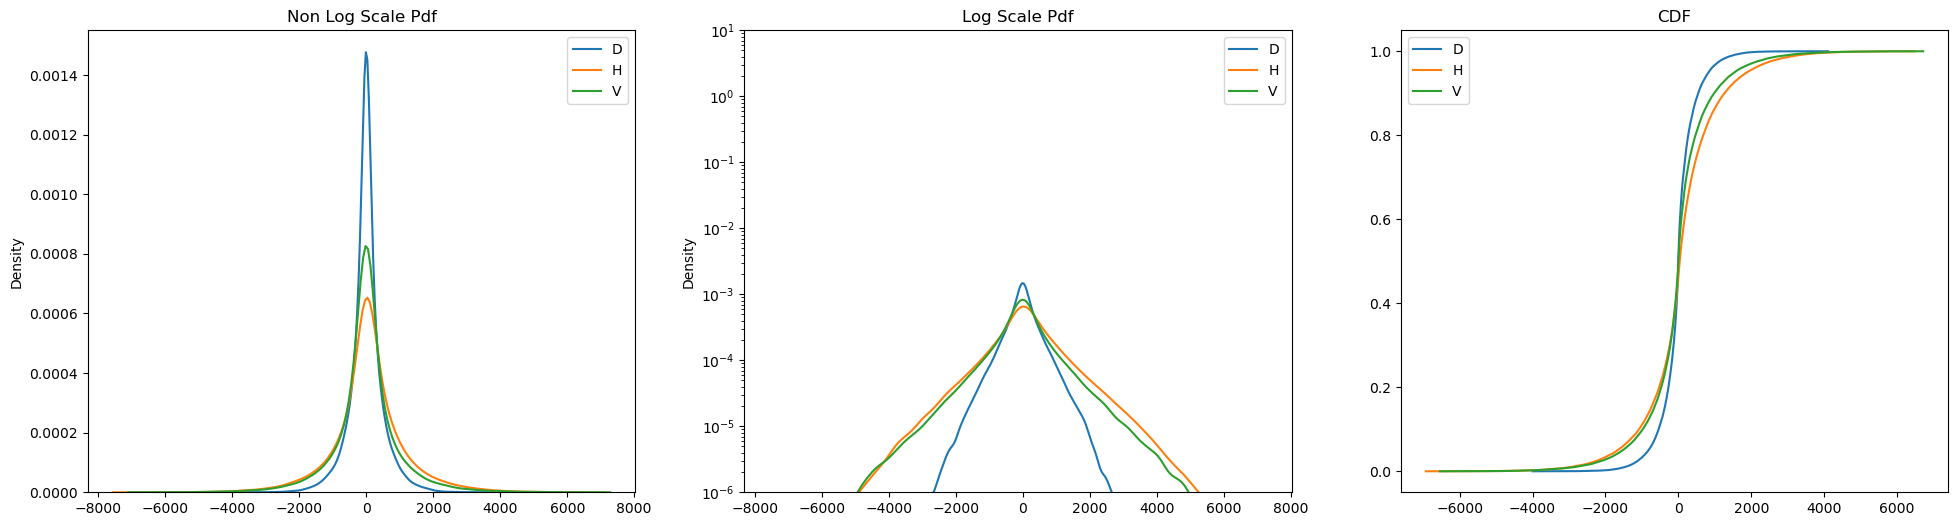

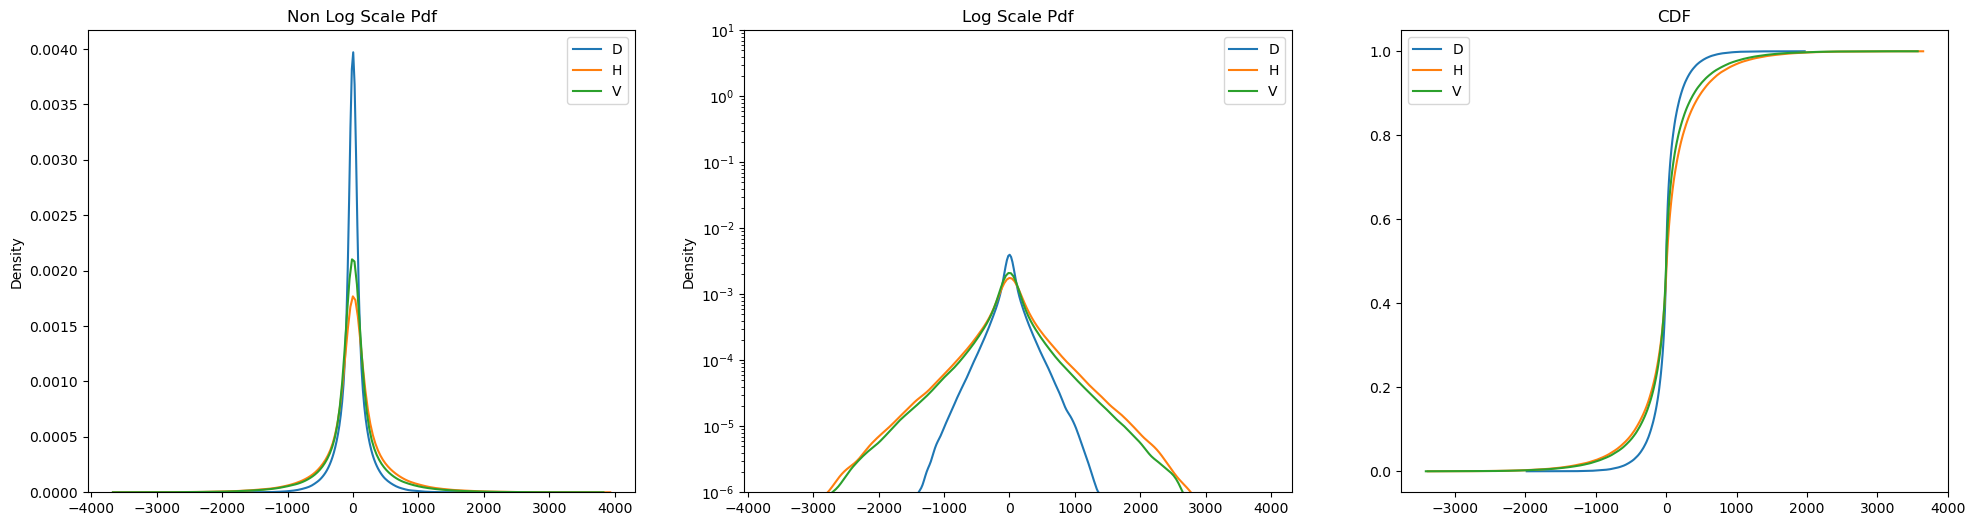

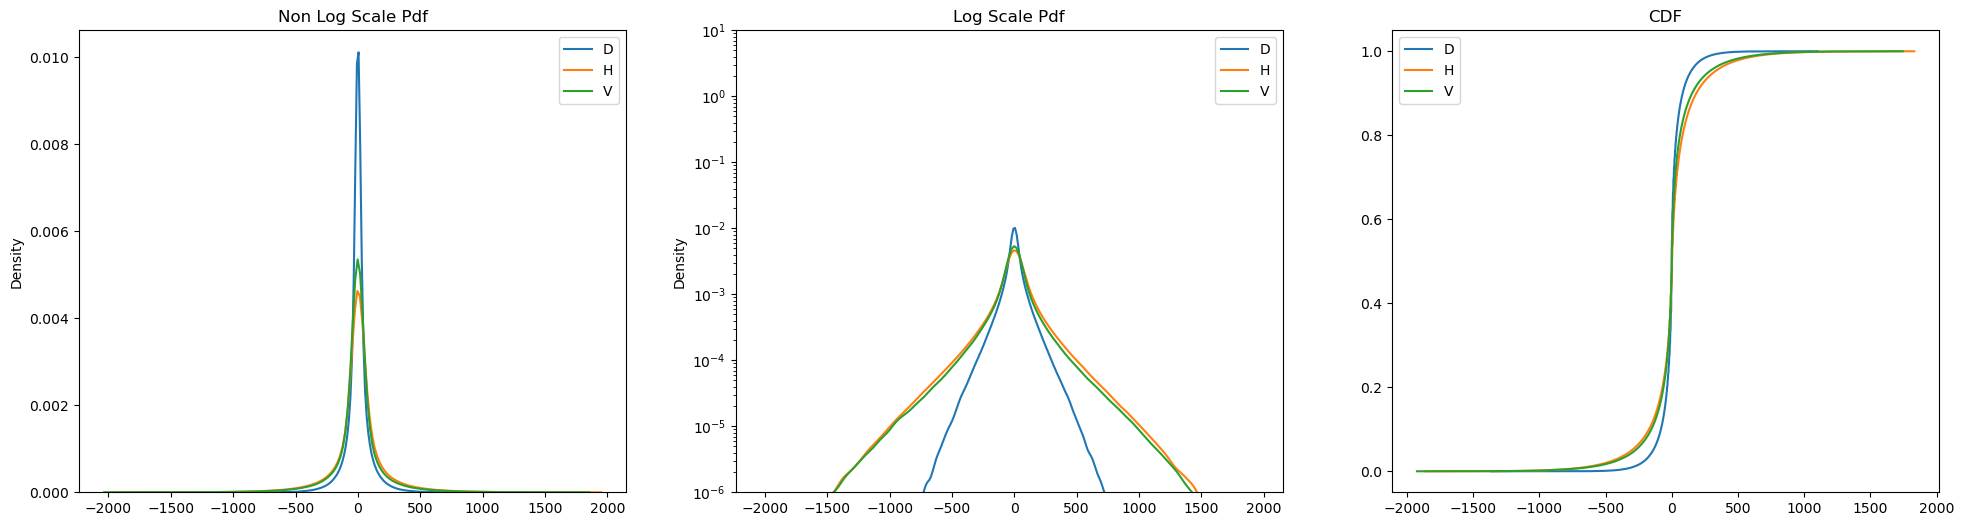

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


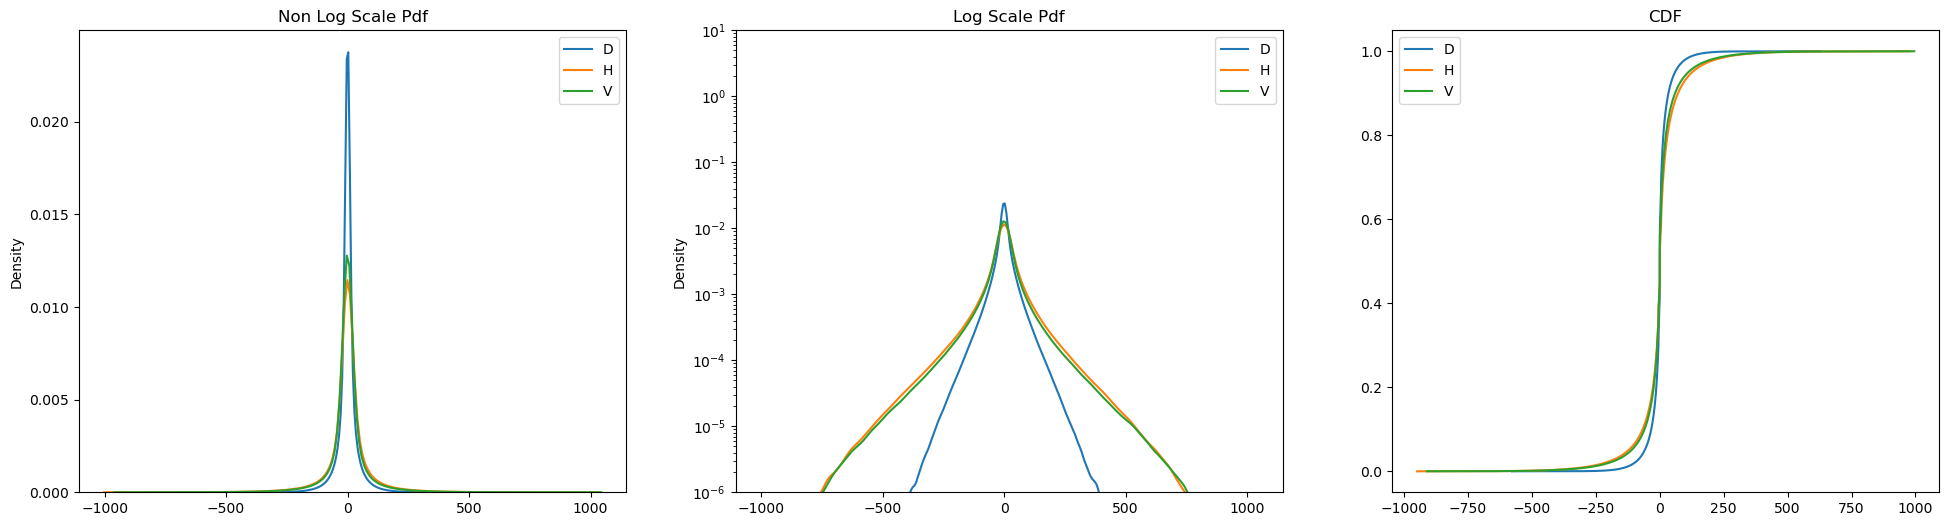

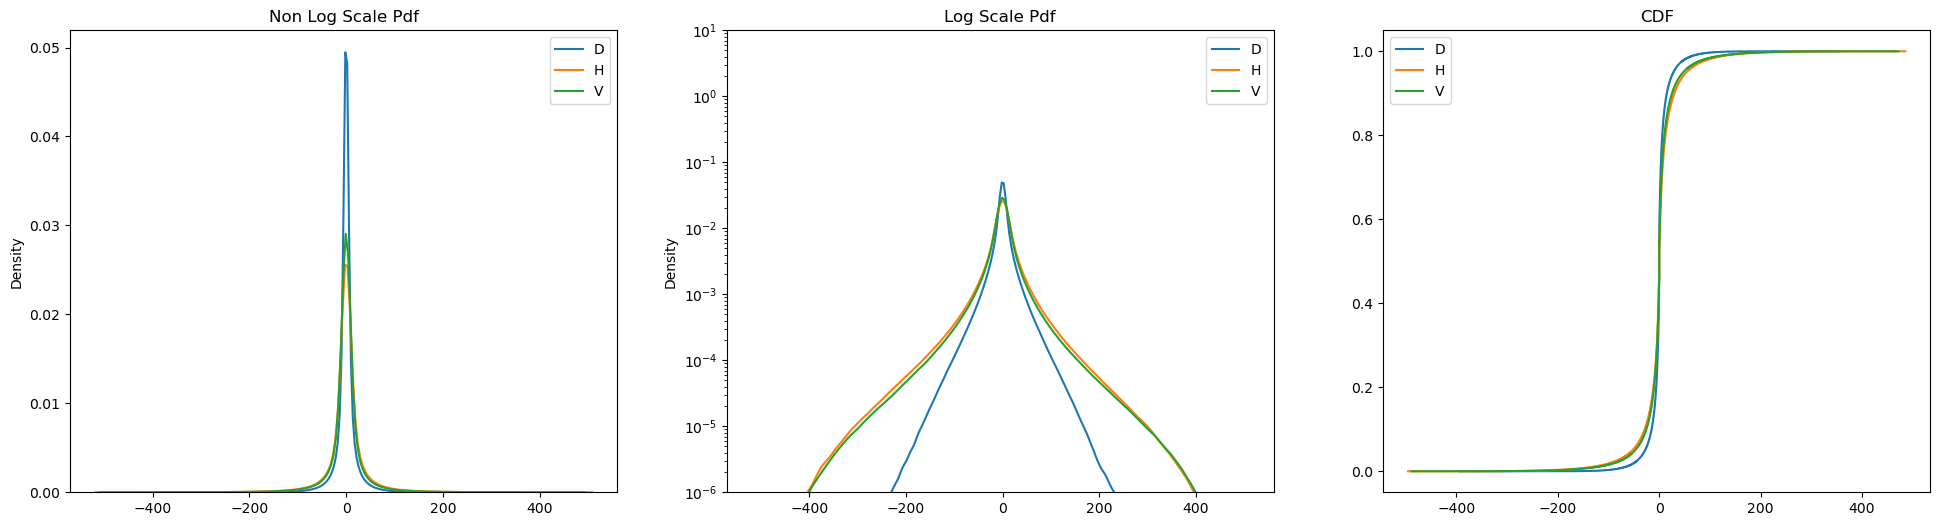

In [17]:
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


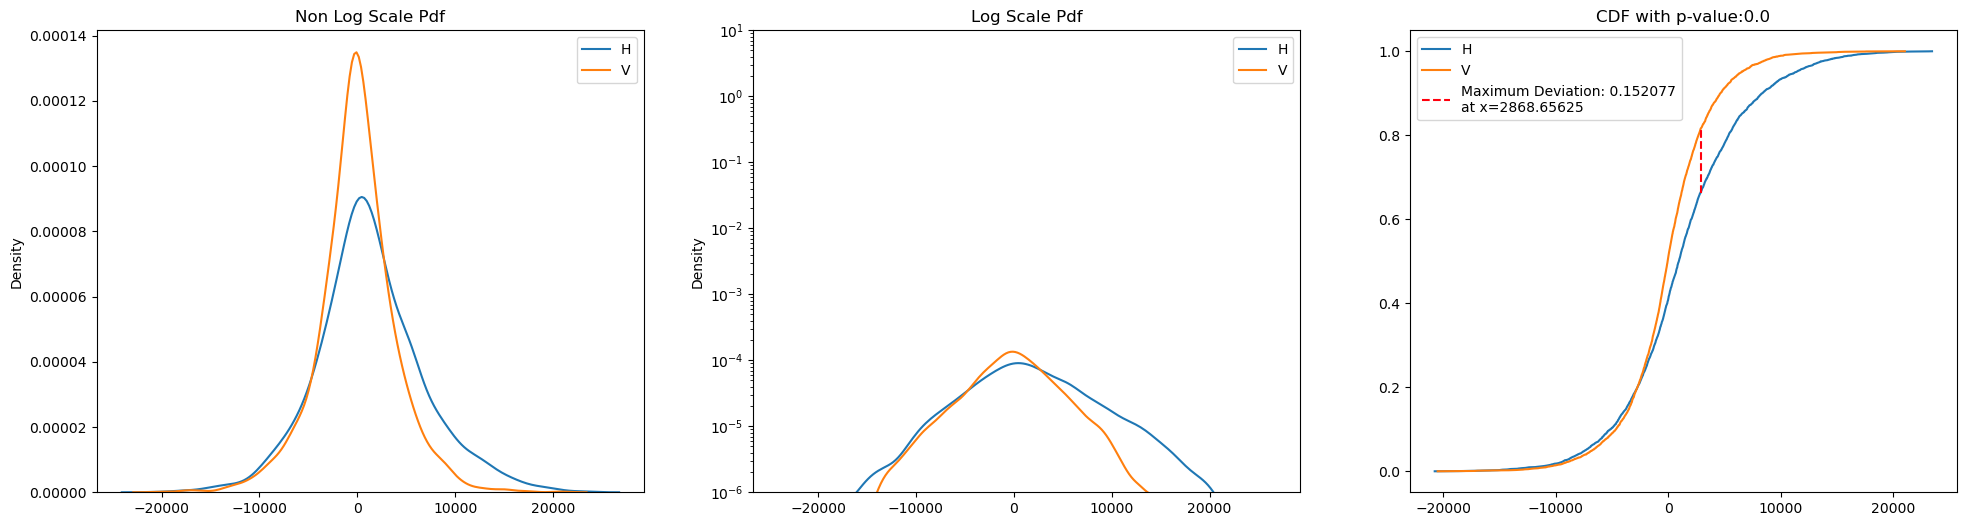

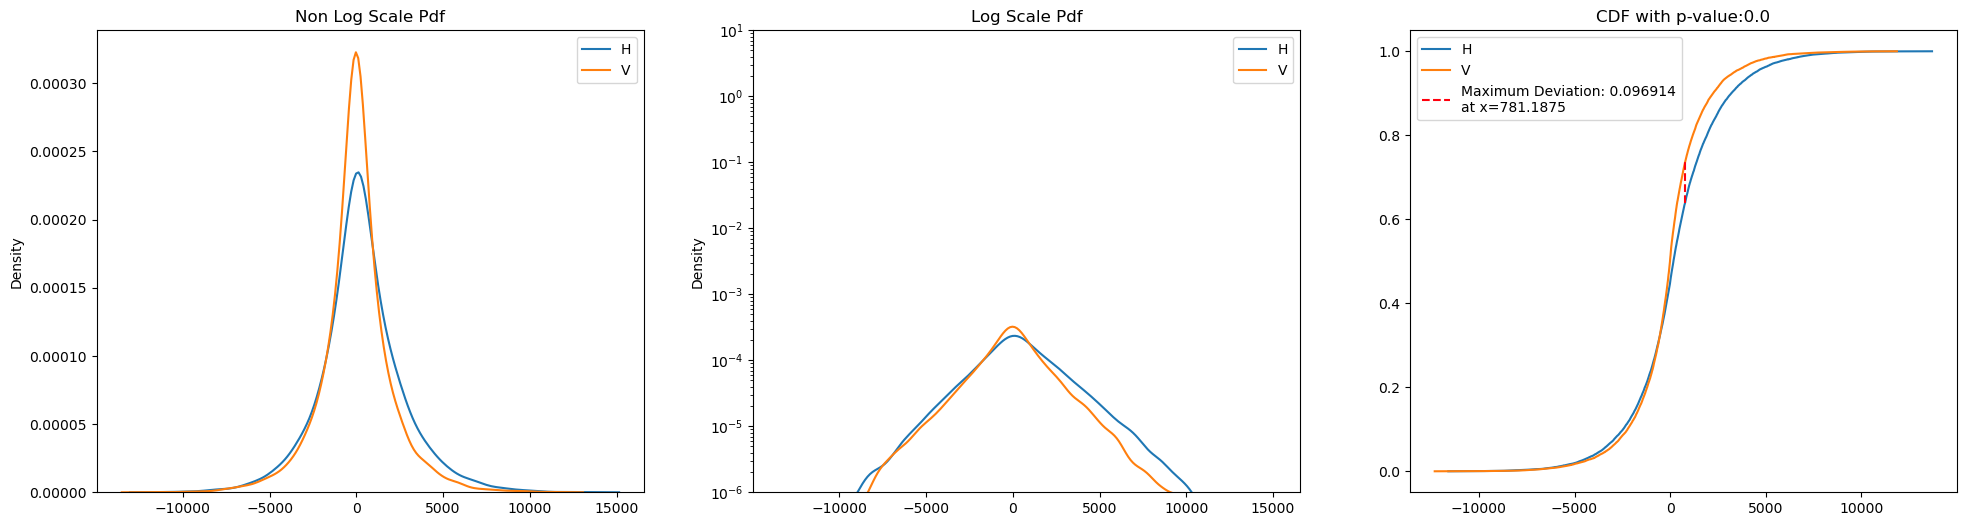

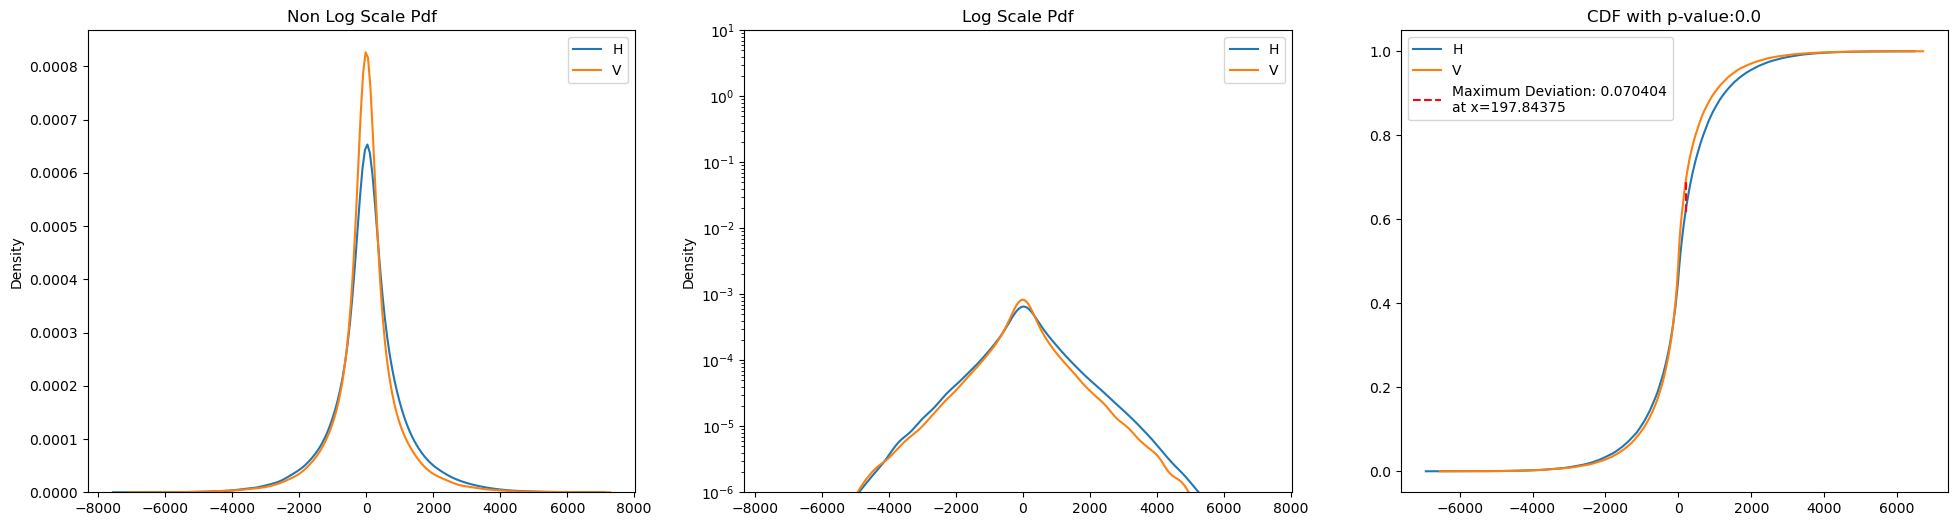

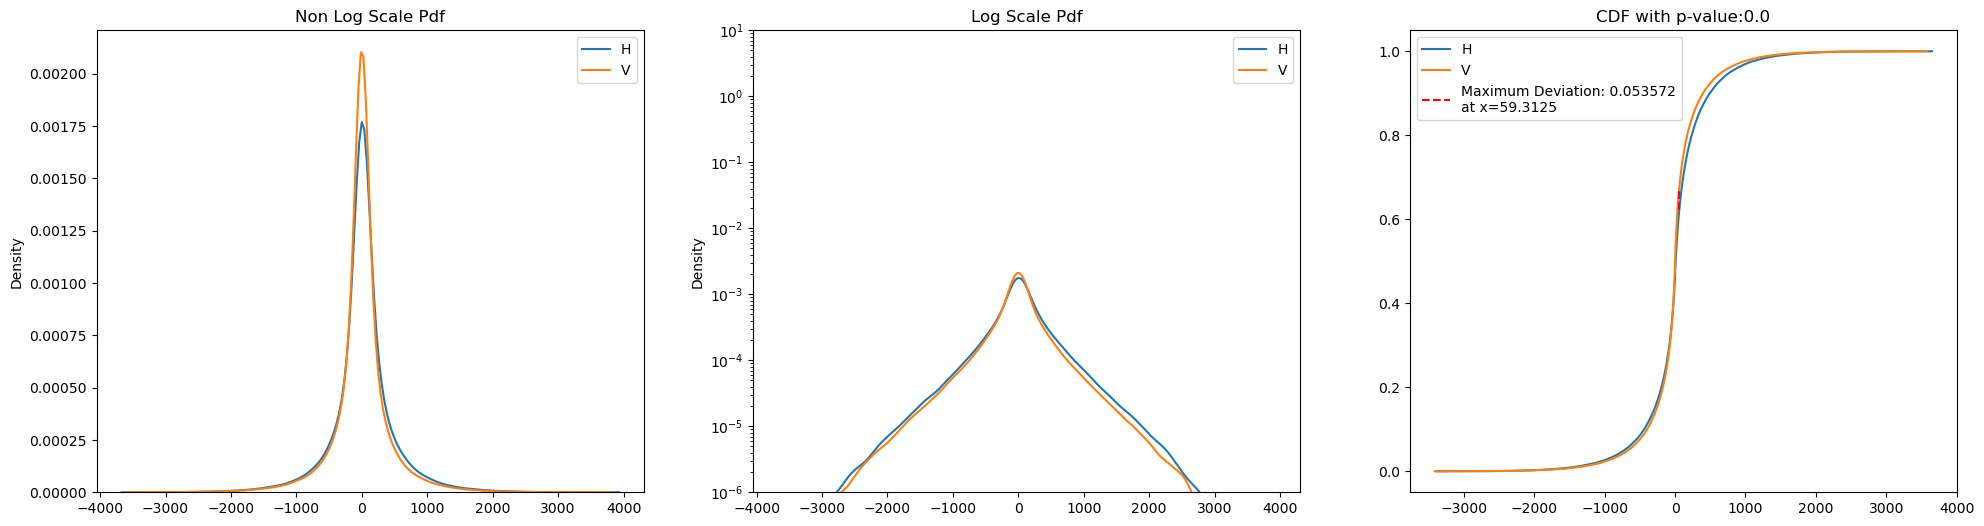

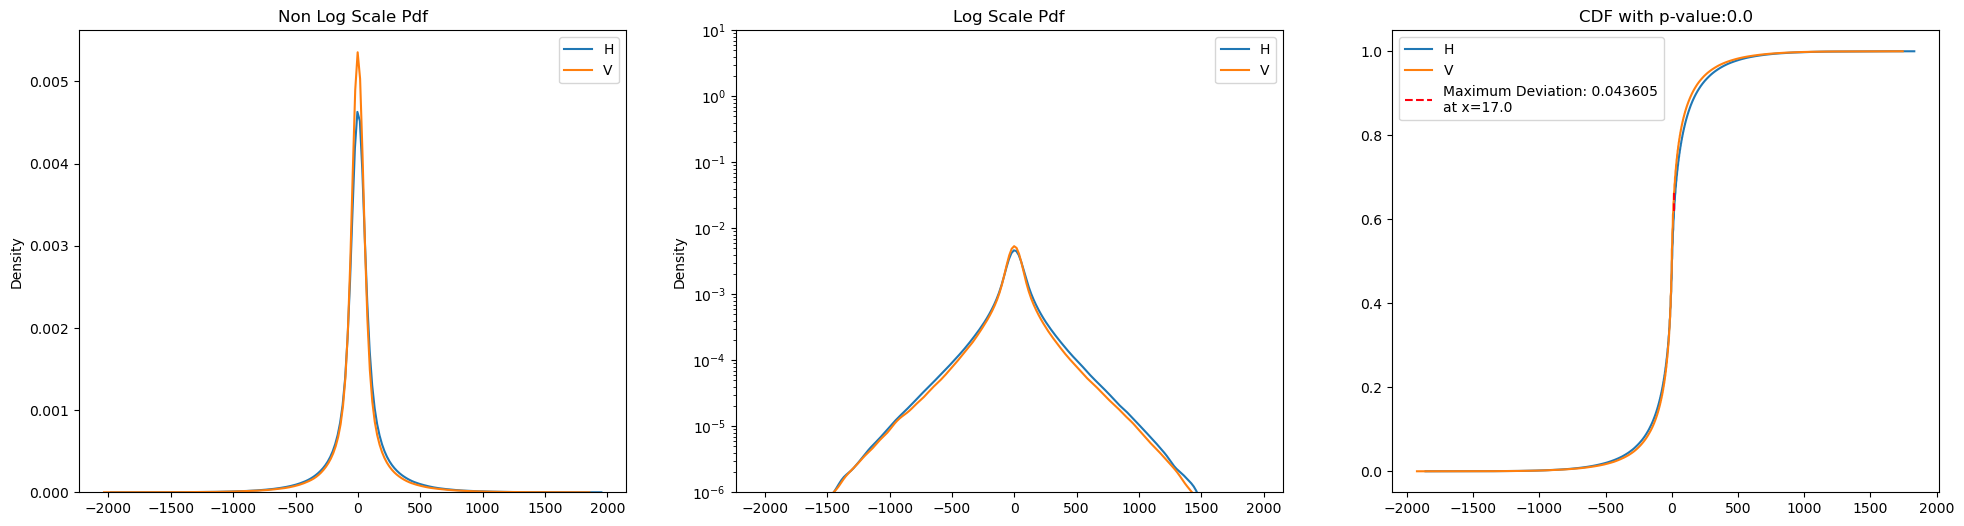

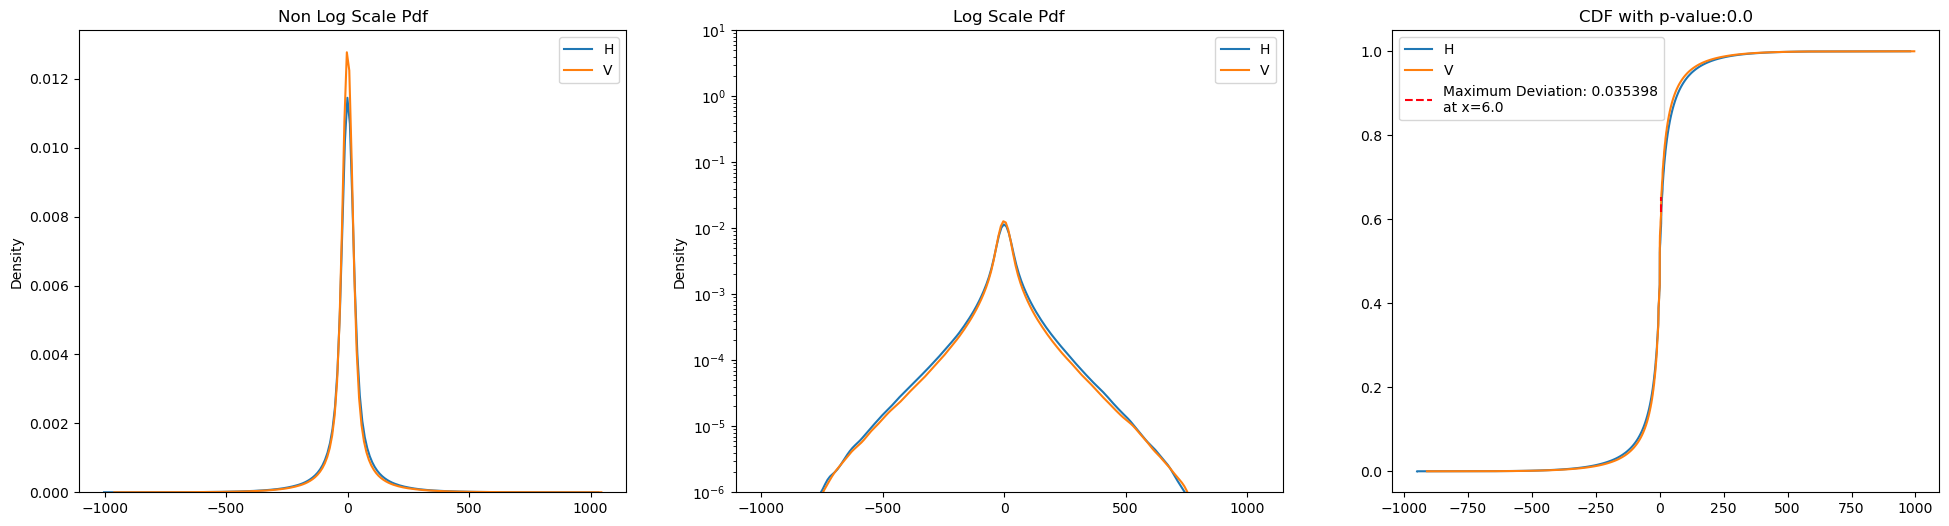

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


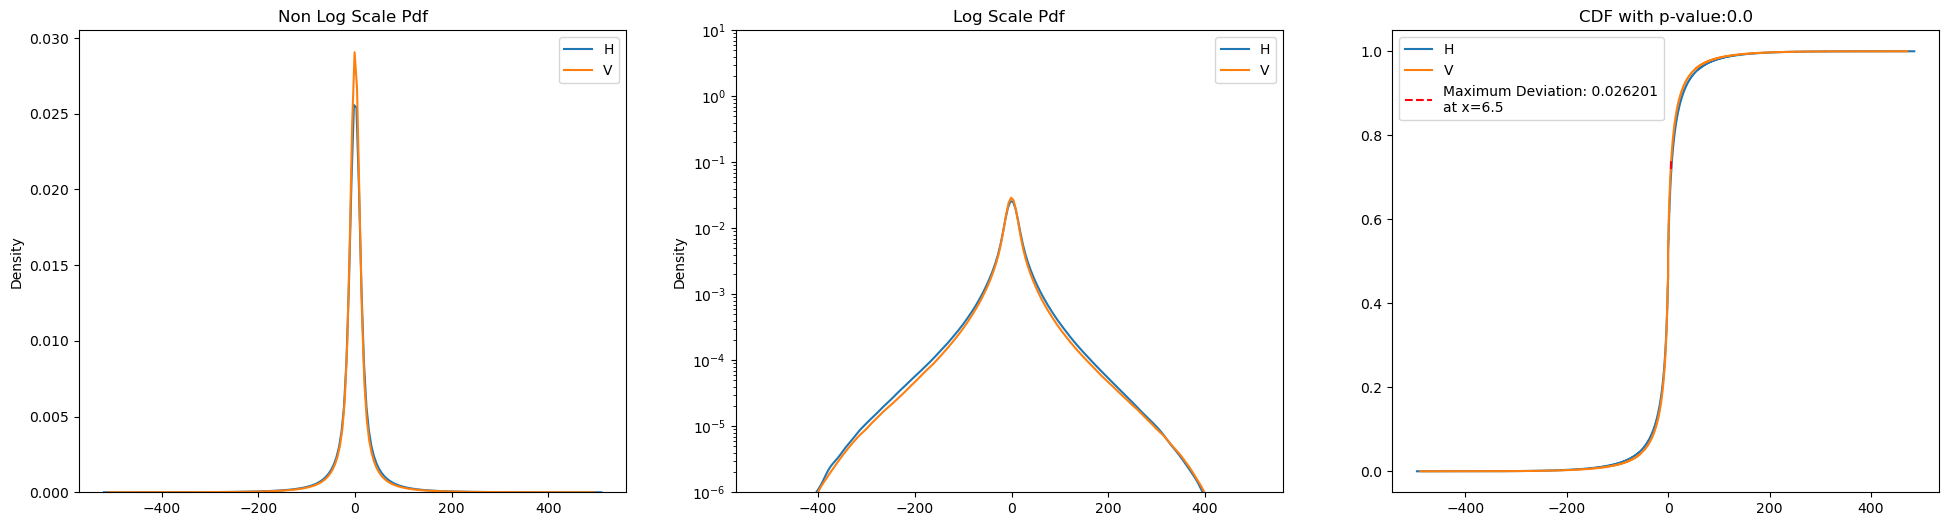

In [18]:
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Gray

In [19]:
gray_wv = convert_to_wavelet_basis(data_dir, "gray", debug=True, image_opener = npz_opener_pil)
gray_wv.head()

9 layers being used


100%|██████████| 4958/4958 [00:11<00:00, 423.66it/s]


channel  layer  frequency orientation  \
0    gray      1   0.110679          L1   
1    gray      2   0.124514           D   
2    gray      2   0.124514           H   
3    gray      2   0.124514           V   
4    gray      3   0.142301           D   

                                                data  
0  [23839.233807031276, 40932.78944804692, 28049....  
1  [4305.211296093754, 130.893233203126, 179.1969...  
2  [-921.9192867187517, 13006.716317578137, 241.4...  
3  [-4073.6626539062563, 595.4215371093742, -2342...  
4  [-1568.4623000000015, 1785.2653312500017, 1300...

In [20]:
gray_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    gray_df = pd.concat([gray_df, ks_df], axis = 0)
gray_df

/var/folders/jd/4sjpm6q97knfqgwsf50gr3jh0000gn/T/ipykernel_15835/1887393883.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gray_df = pd.concat([gray_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
1     2     D      V  0.096410   1.811139e-20
2     2     H      V  0.150061   4.320446e-49
0     2     D      H  0.233159  1.488969e-118
2     3     H      V  0.090157   1.382281e-70
1     3     D      V  0.092124   1.099593e-73
0     3     D      H  0.175978  4.582107e-269
2     4     H      V  0.066723  5.661946e-154
1     4     D      V  0.085808  1.551444e-254
0     4     D      H  0.144451   0.000000e+00
2     5     H      V  0.051662   0.000000e+00
1     5     D      V  0.079477   0.000000e+00
0     5     D      H  0.125463   0.000000e+00
2     6     H      V  0.041367   0.000000e+00
1     6     D      V  0.073757   0.000000e+00
0     6     D      H  0.111290   0.000000e+00
2     7     H      V  0.035461   0.000000e+00
1     7     D      V  0.078555   0.000000e+00
0     7     D      H  0.106687   0.000000e+00
2     8     H      V  0.024953   0.000000e+00
1     8     D      V  0.057816   0.000000e+00
0     8     D      H  0.082670   0.000000e+00

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


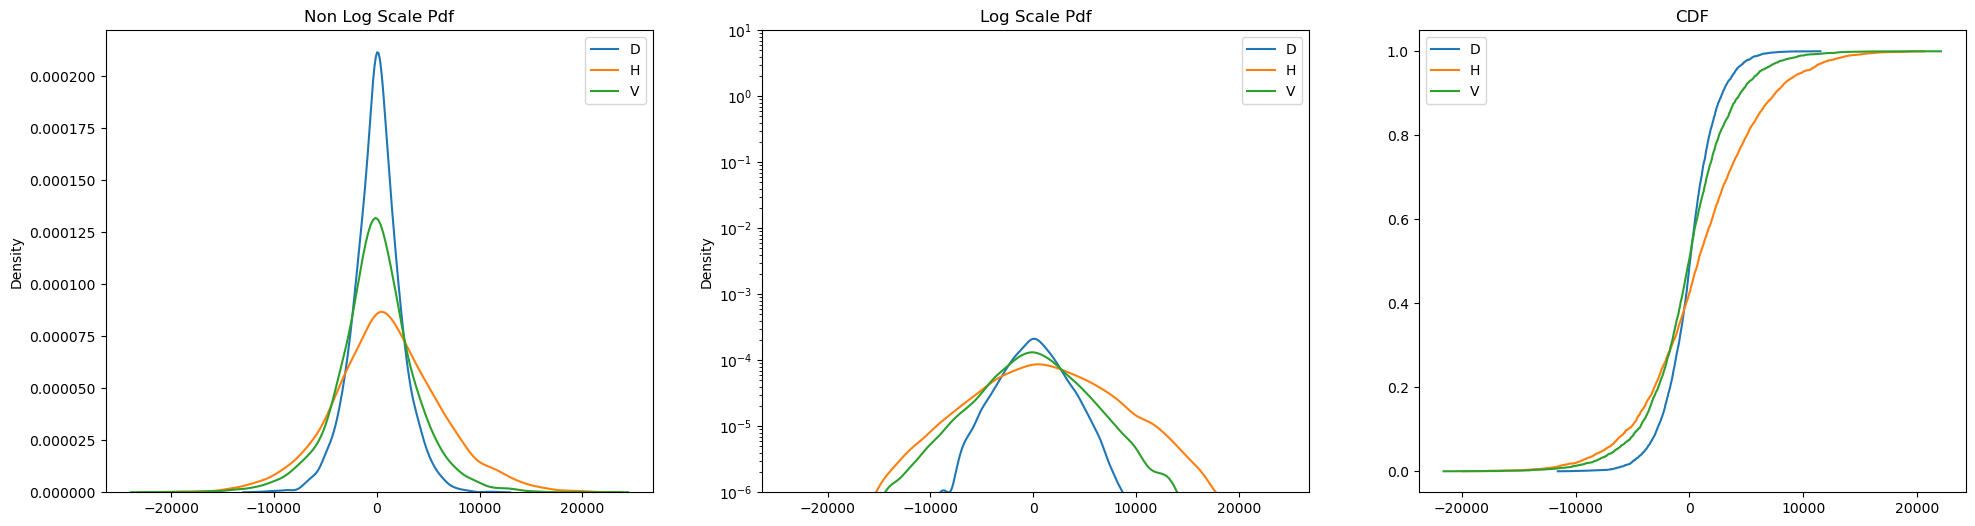

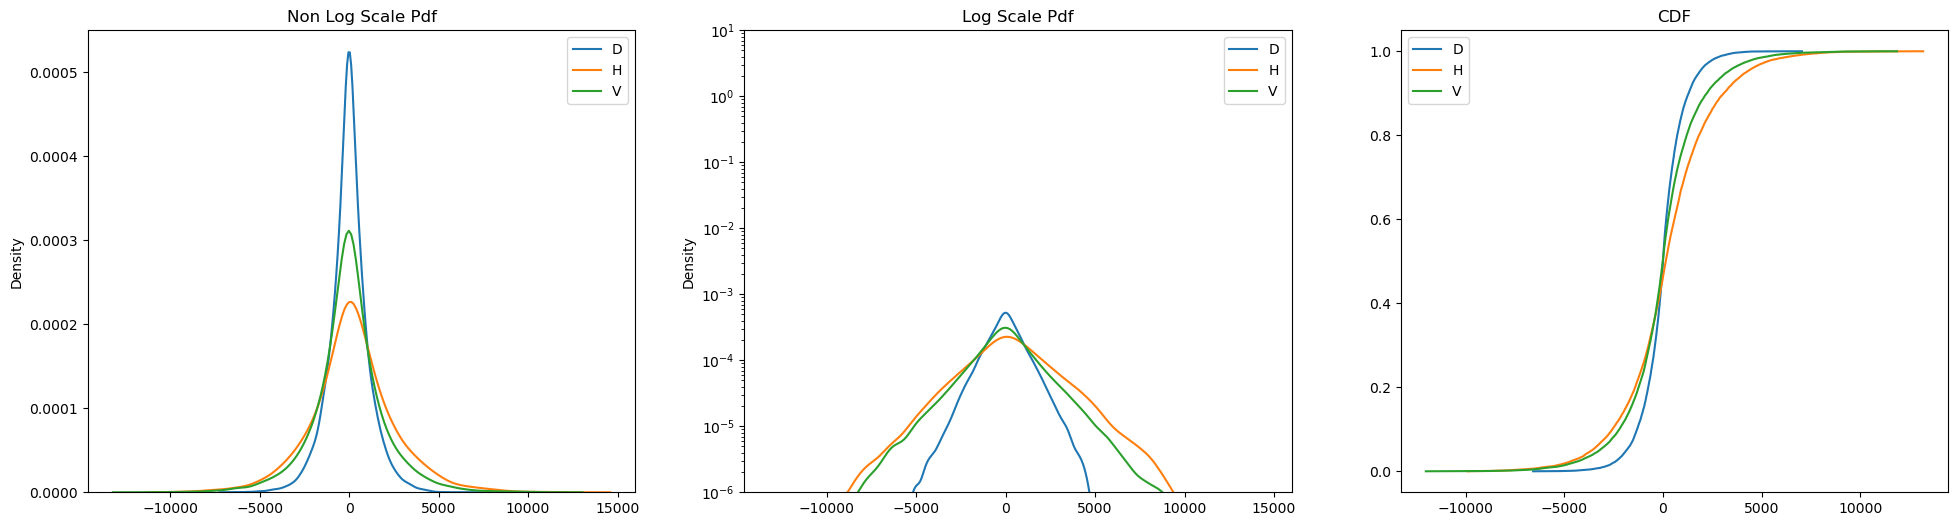

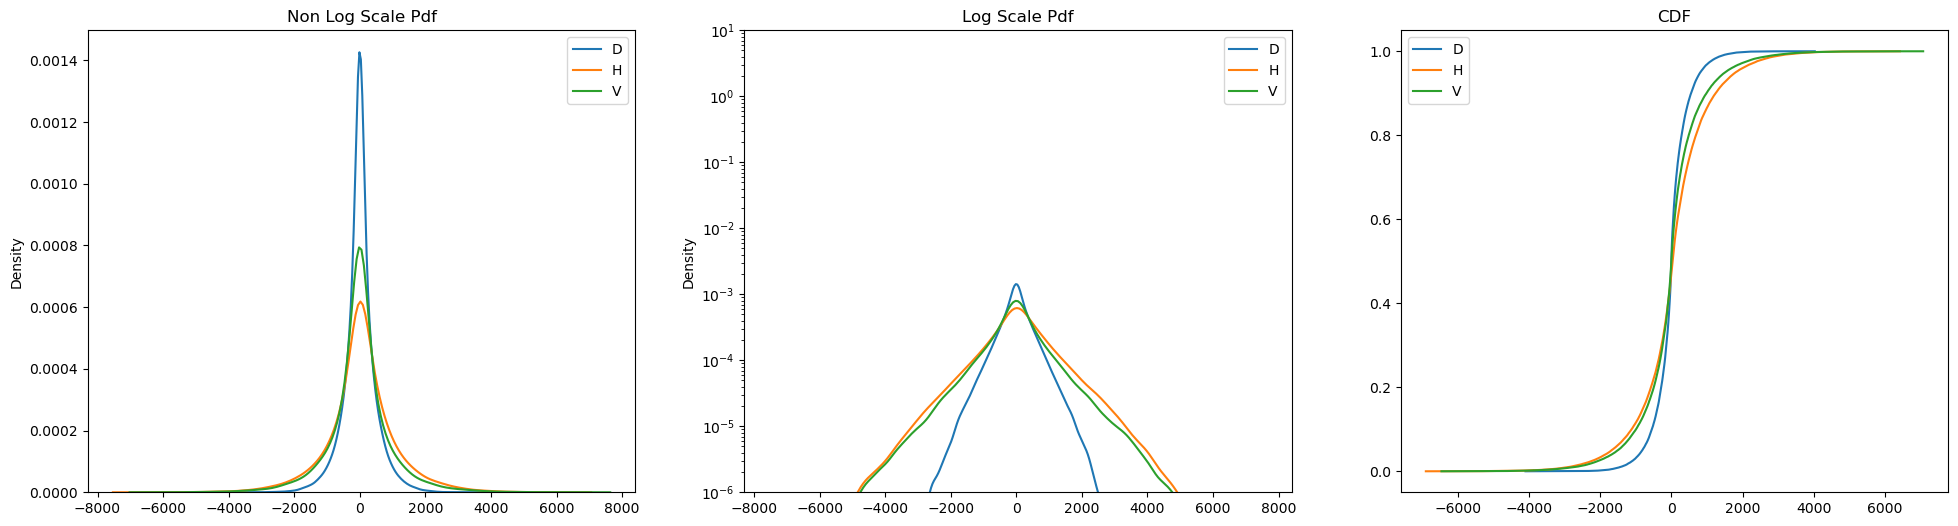

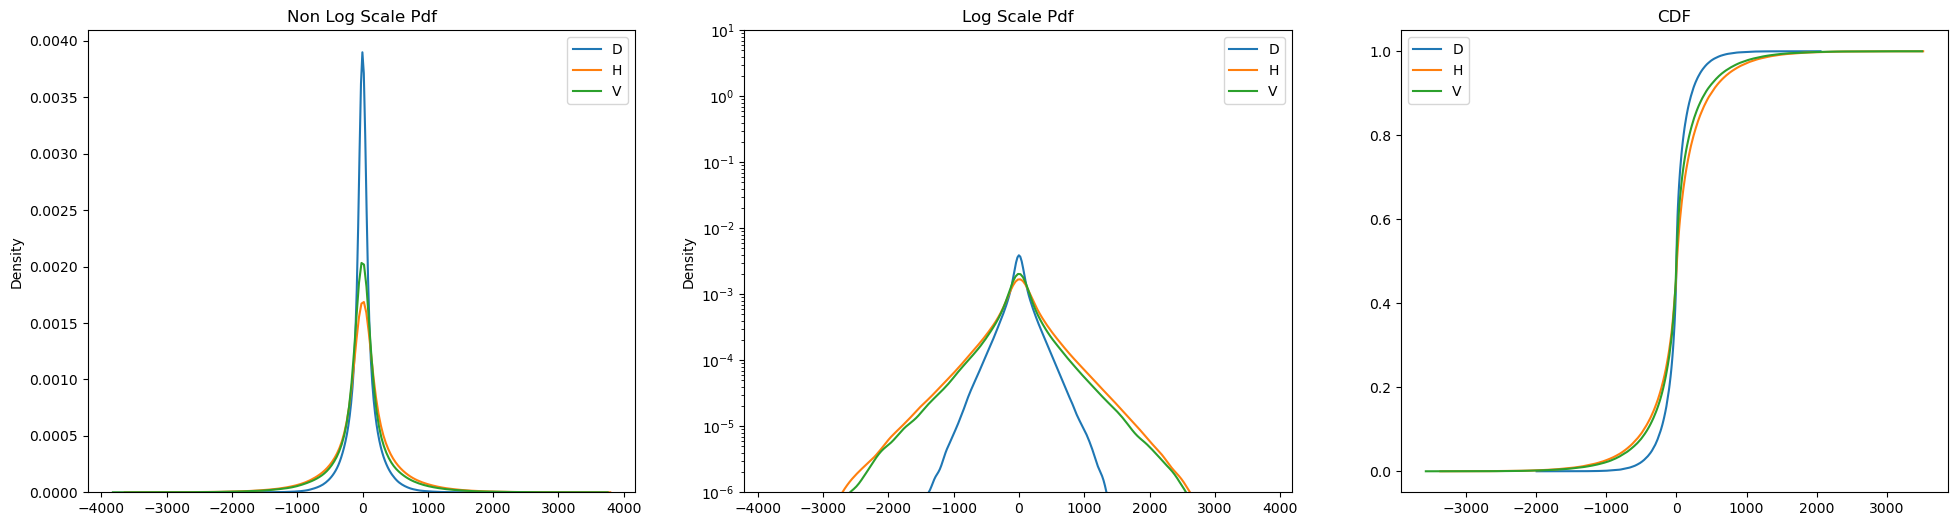

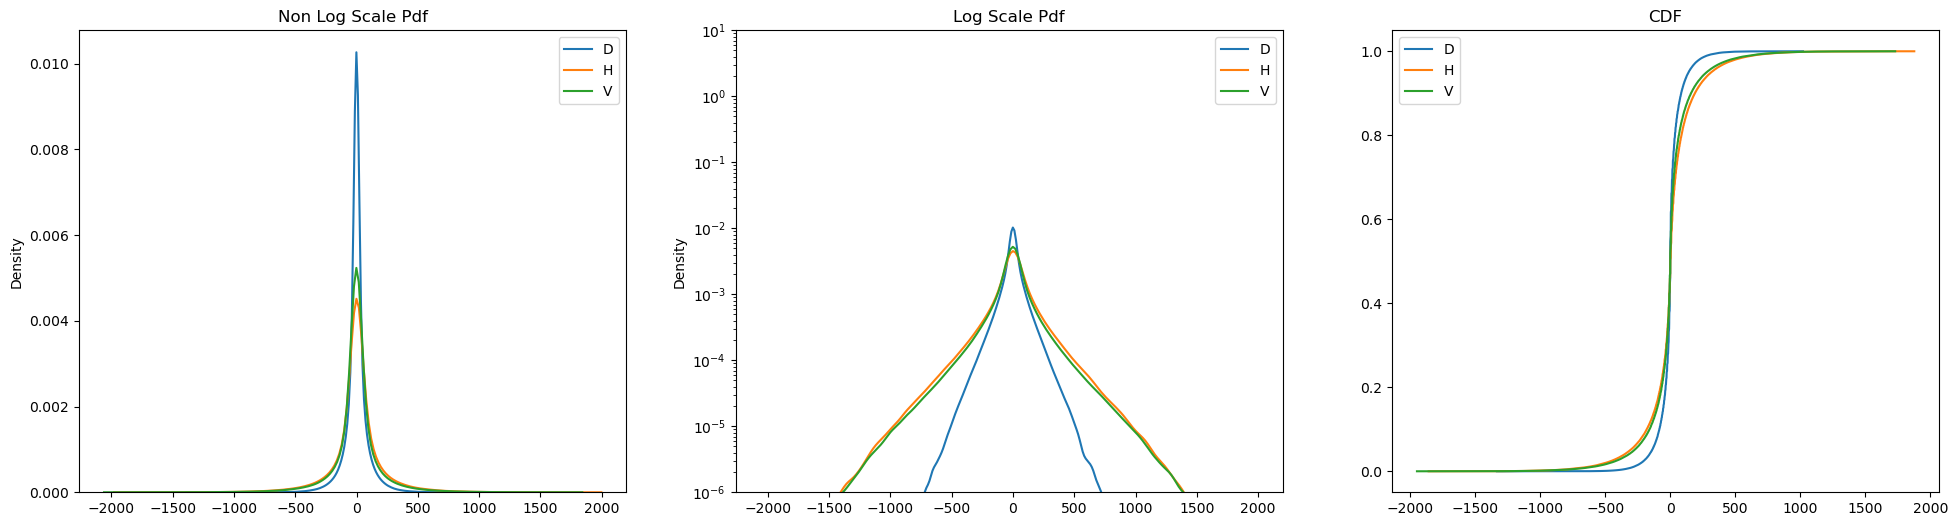

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


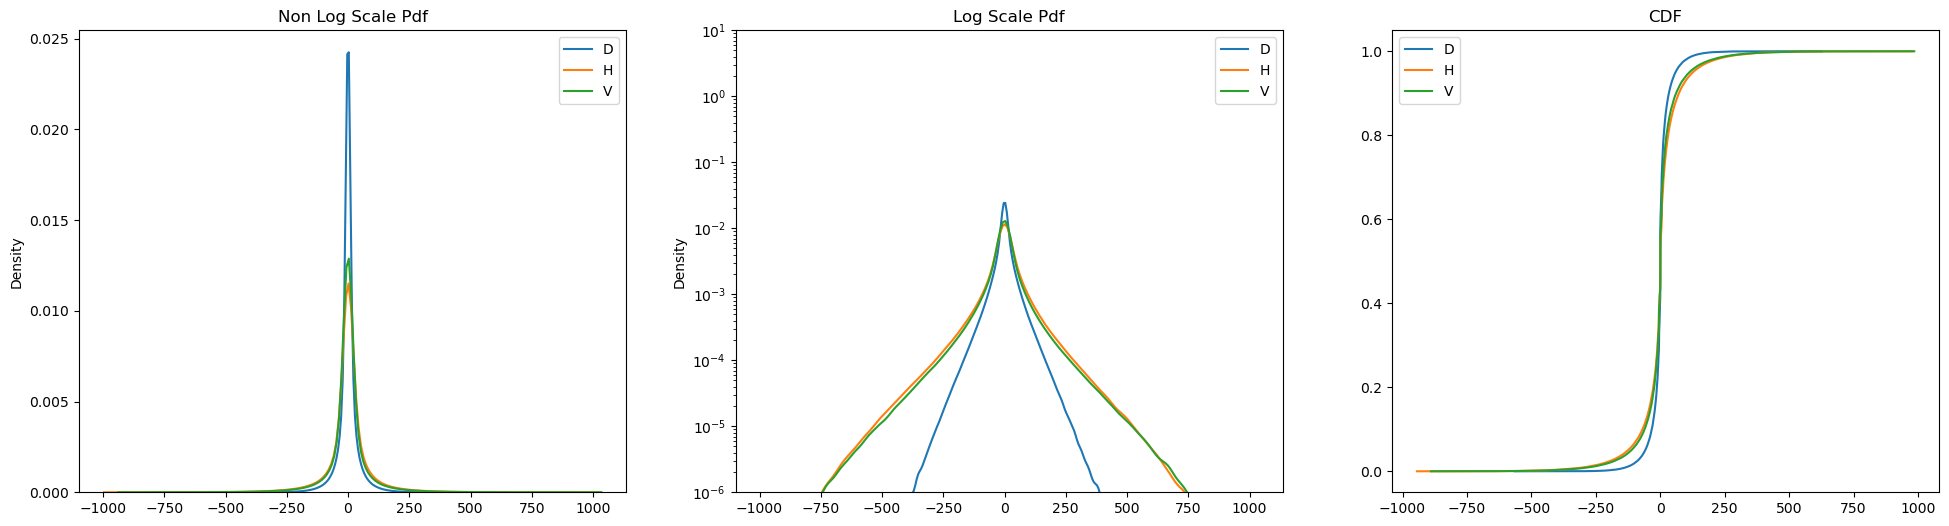

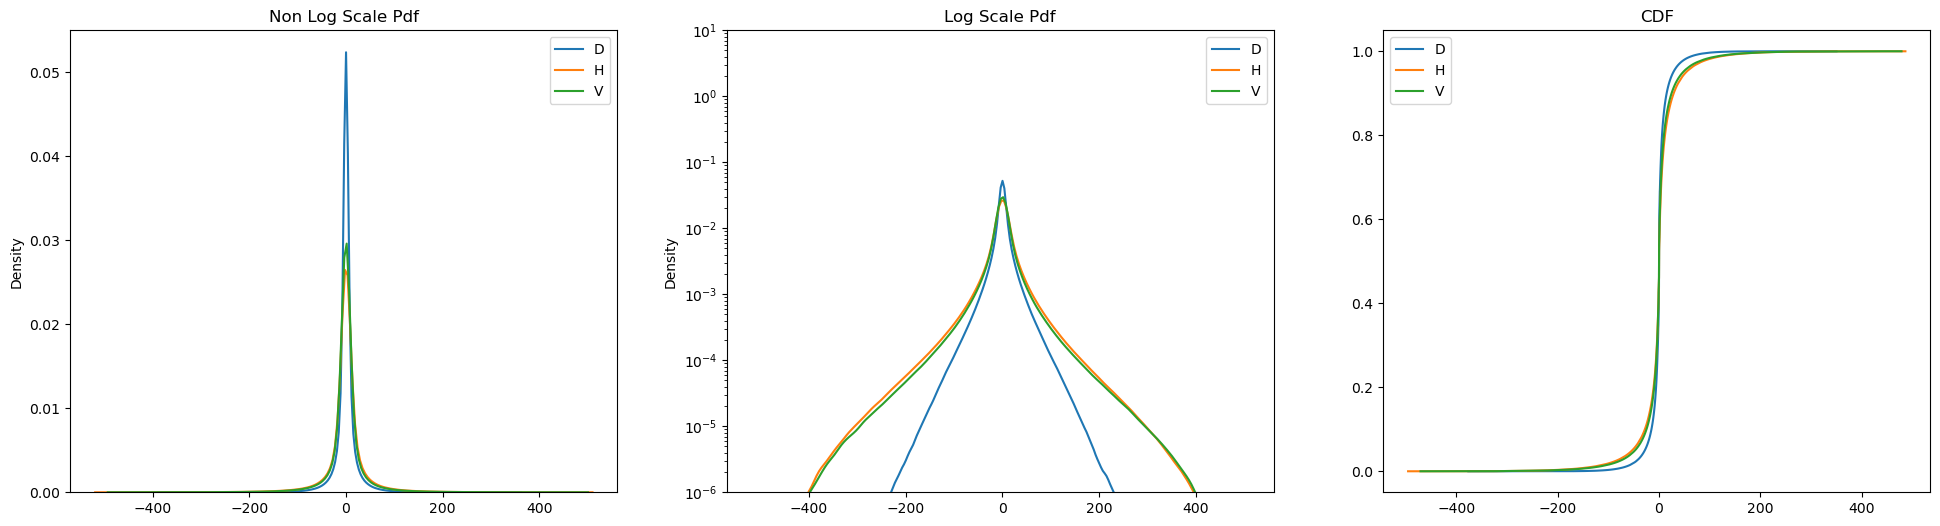

In [21]:
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


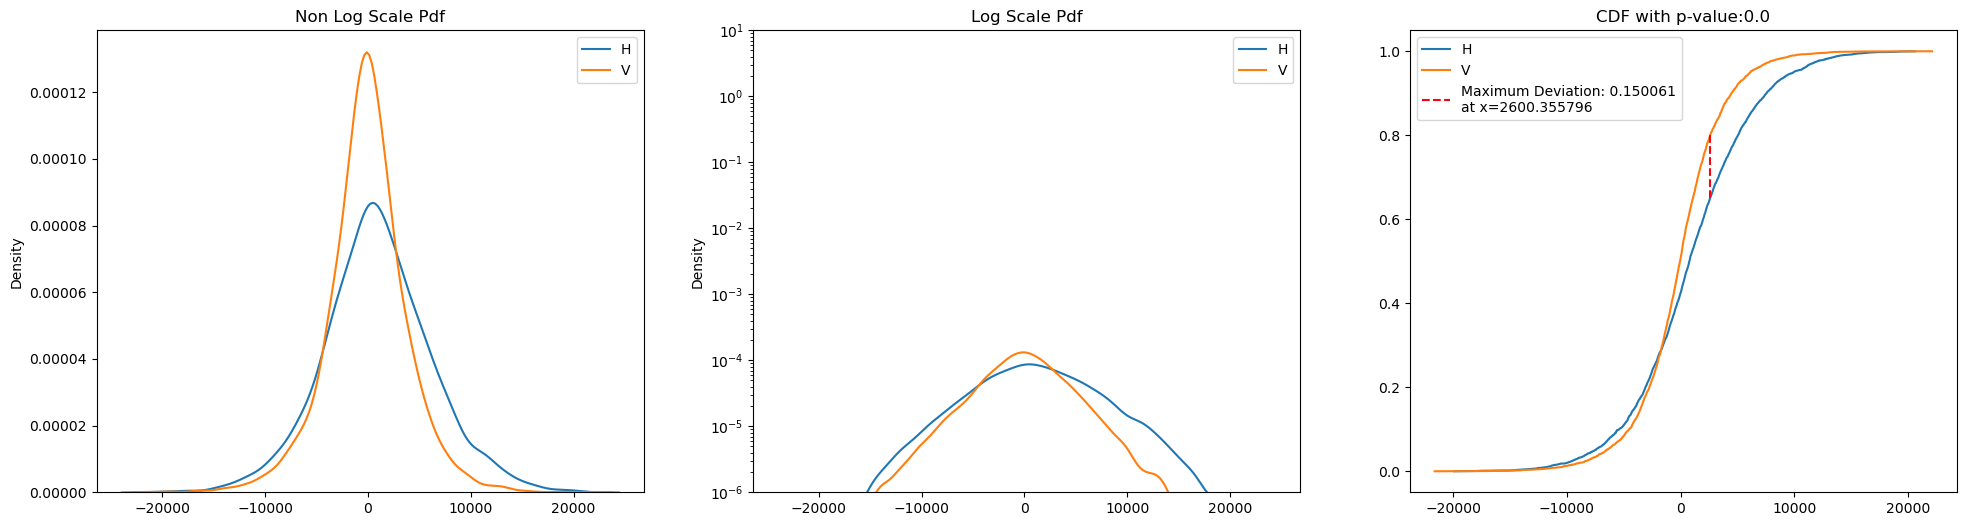

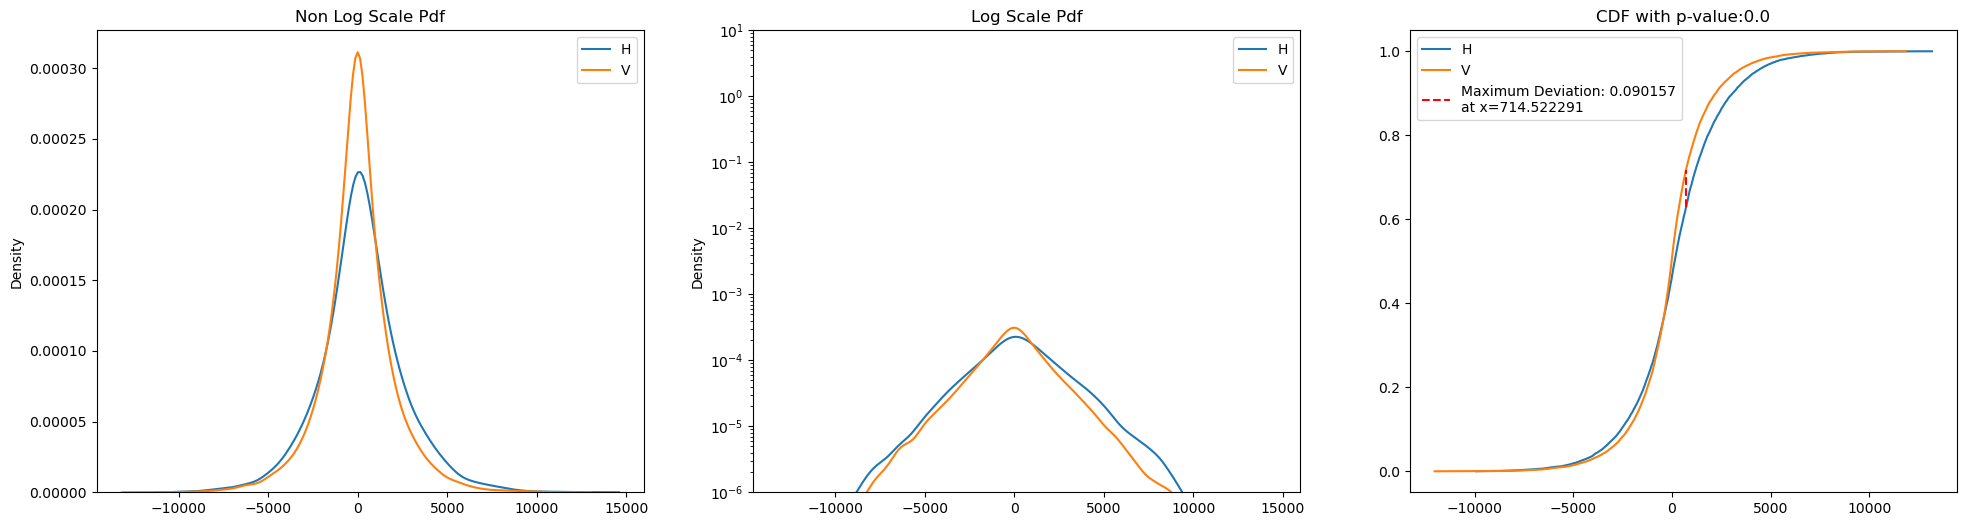

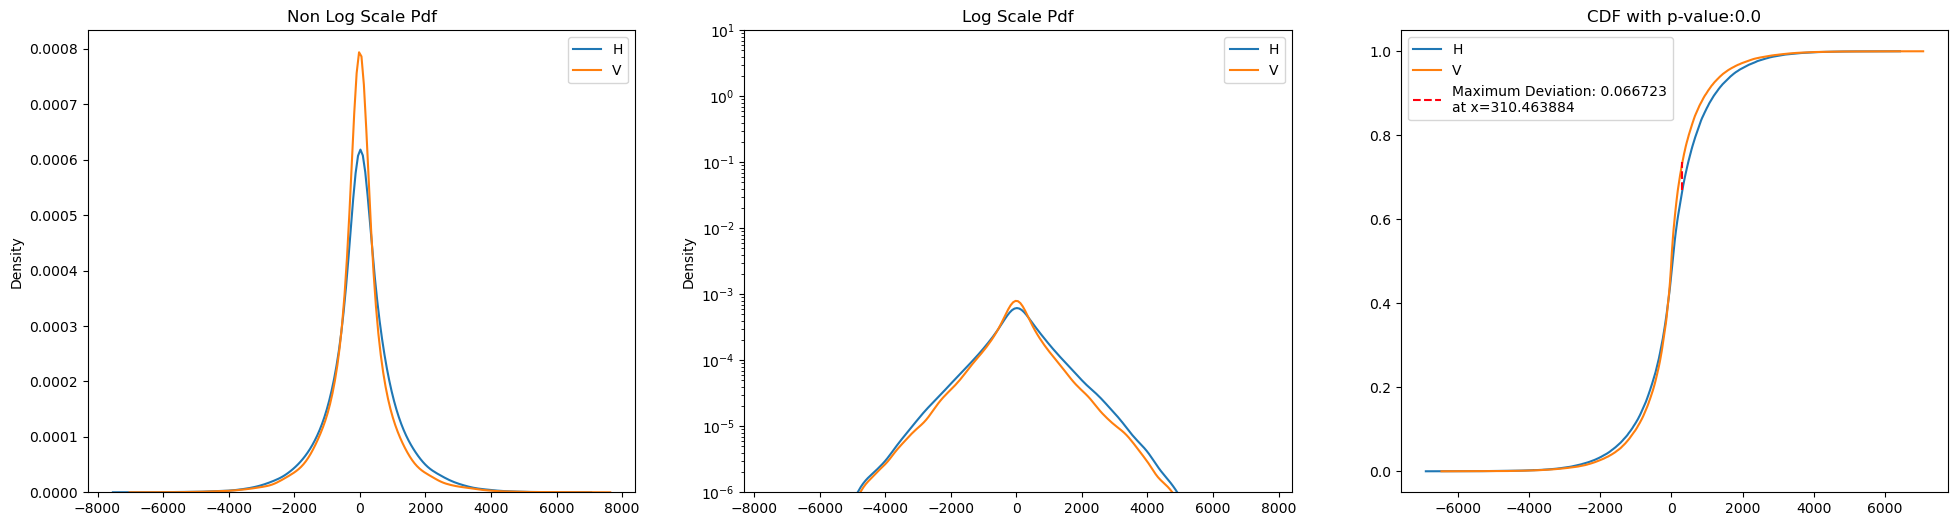

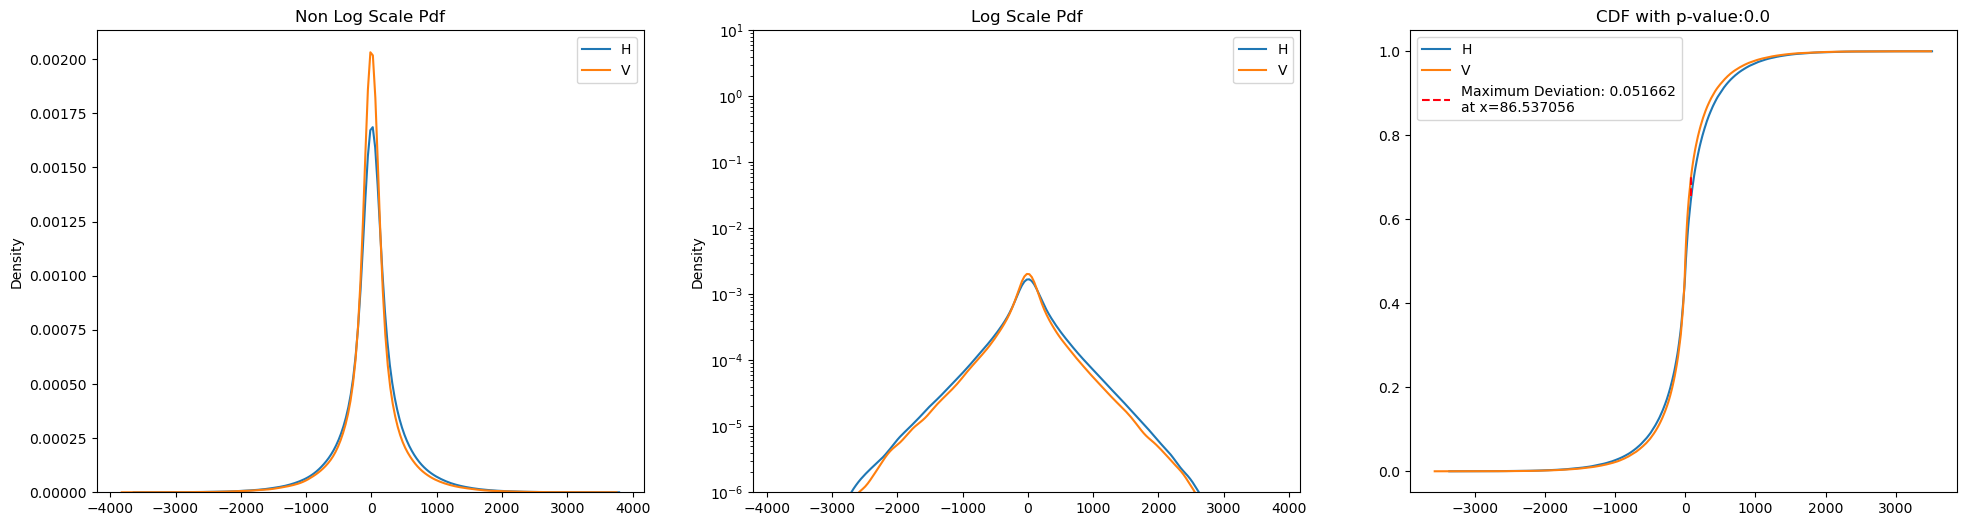

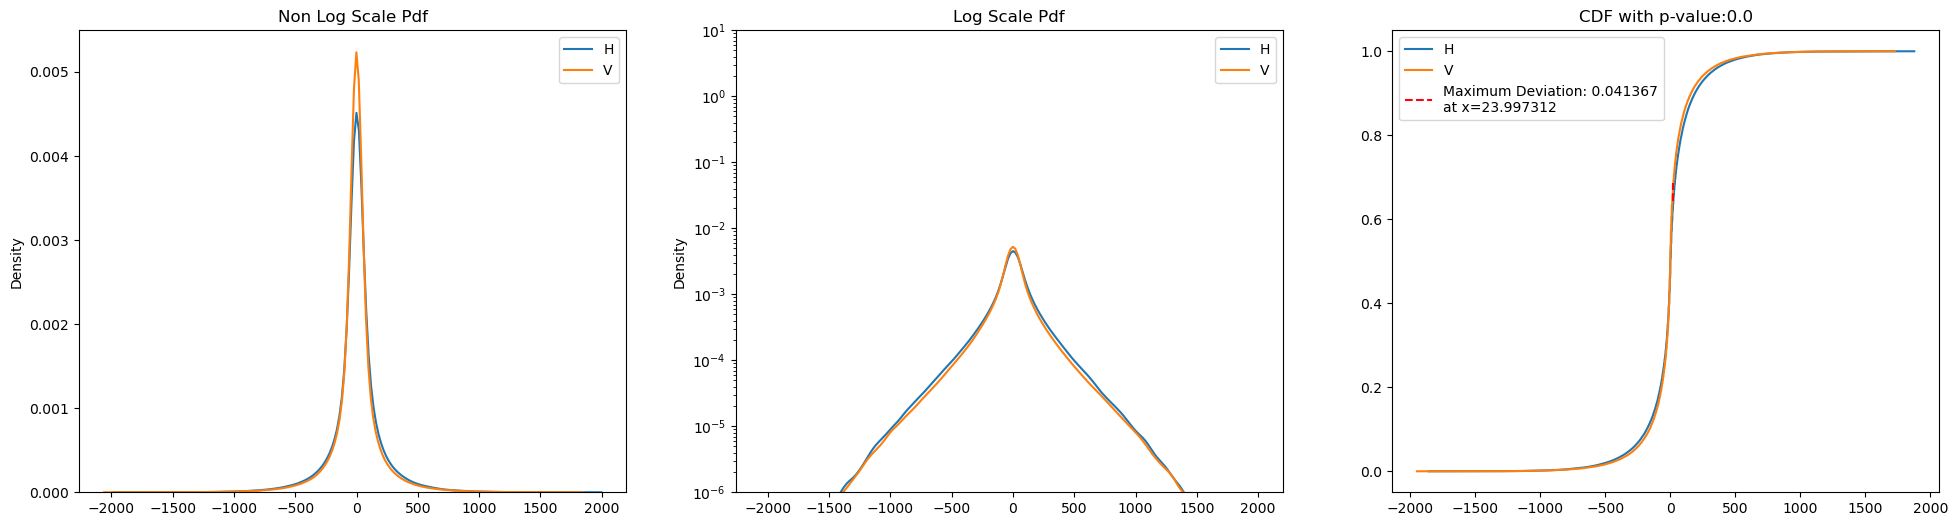

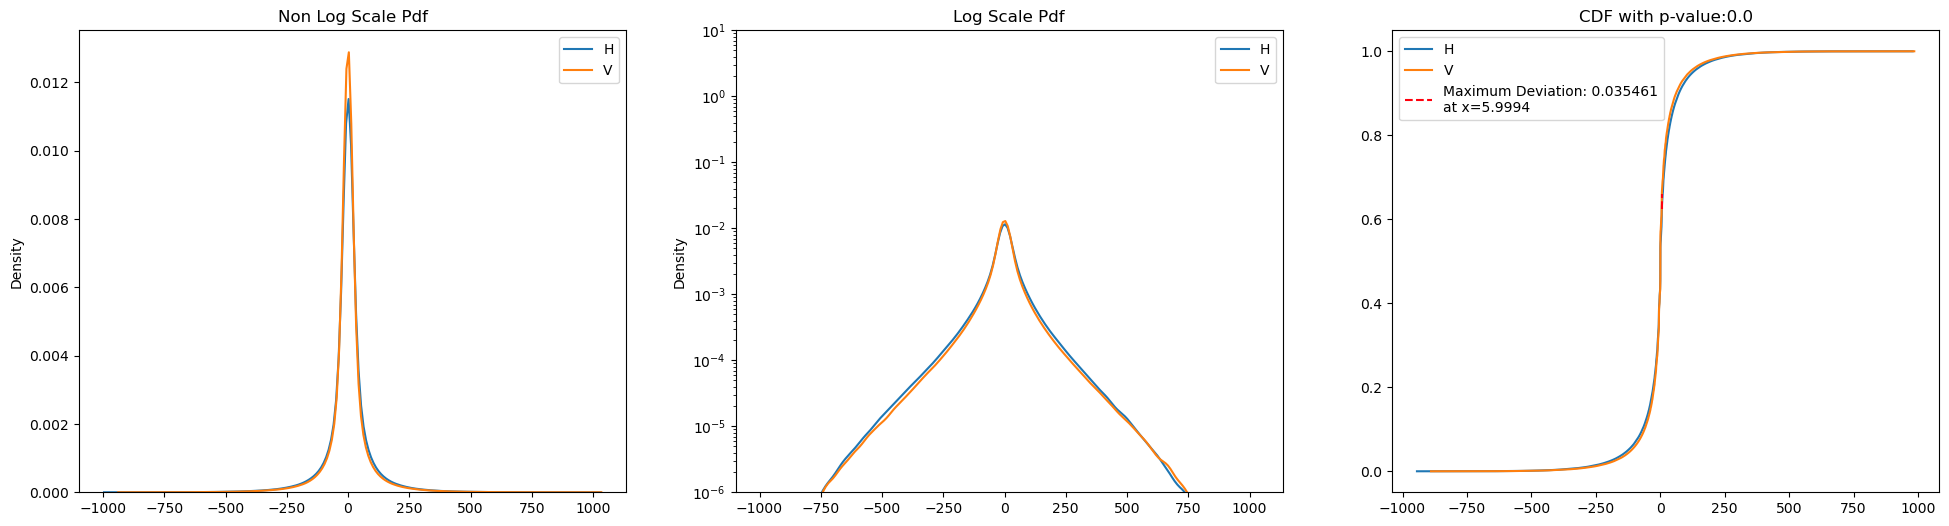

/opt/anaconda3/envs/hbmv_2/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


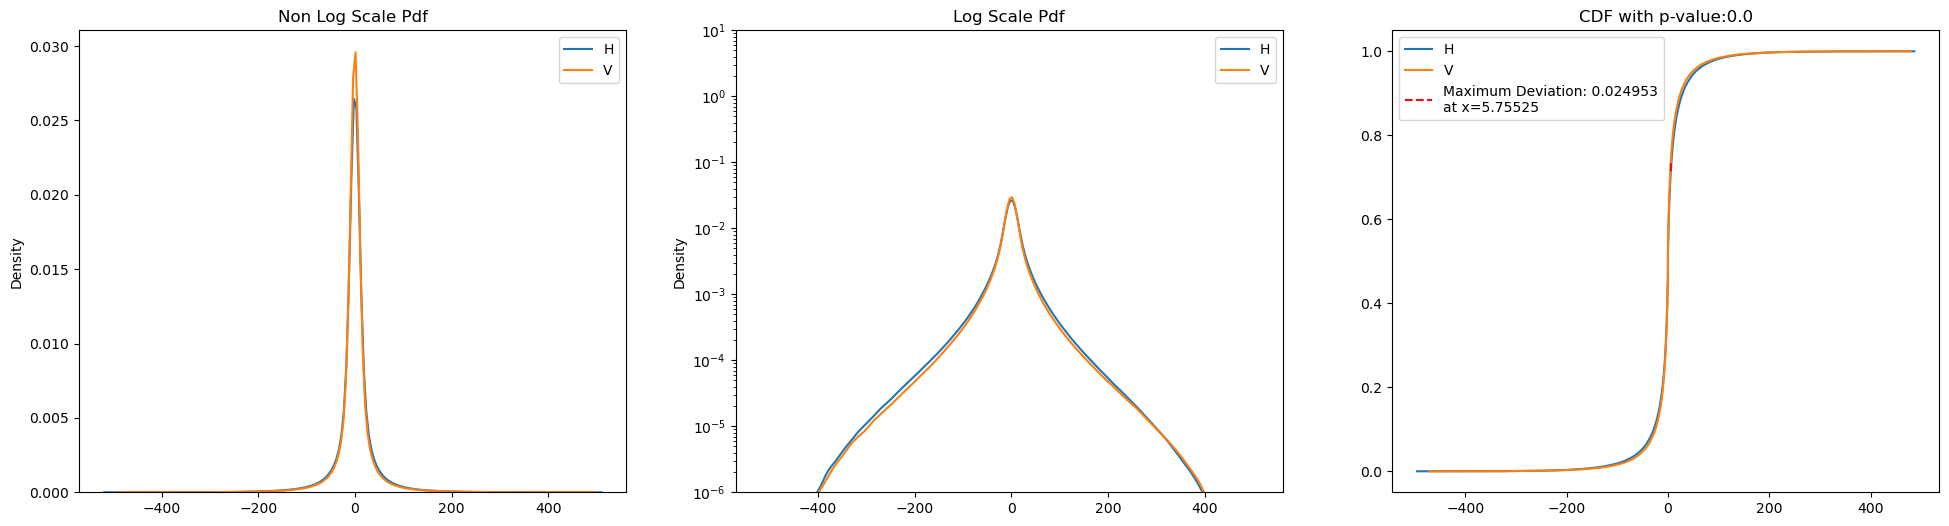

In [22]:
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")